In [2]:
import pandas as pd
from textblob import TextBlob
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import nltk
from nltk import bigrams
from nltk.corpus import stopwords
import re
import networkx as nx
import warnings
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
import plotly.express as px

warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
#Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
# Run Query separately

In [5]:
df=pd.read_csv('hybrid AND control AND powertrain AND filterdataset.csv')
df=df.dropna(axis=0)

FileNotFoundError: ignored

In [ ]:
df.head()

Unnamed: 0  @_fa                             dc:identifier  \
0           0  True          DOI:10.1016/j.energy.2020.118286   
1           1  True         DOI:10.1016/j.jclepro.2020.120711   
2           2  True        DOI:10.1016/j.apenergy.2020.114873   
3           3  True        DOI:10.1016/j.apenergy.2020.114553   
4           4  True  DOI:10.1016/j.mechmachtheory.2019.103731   

                                            dc:title  \
0  Comparison of four-wheel-drive hybrid powertra...   
1  Representation, generation, and optimization m...   
2  Optimal control of power-split hybrid electric...   
3  A survey of powertrain configuration studies o...   
4  Synthesis and analysis method for powertrain c...   

                                                link  \
0  {'self': 'https://api.elsevier.com/content/art...   
1  {'self': 'https://api.elsevier.com/content/art...   
2  {'self': 'https://api.elsevier.com/content/art...   
3  {'self': 'https://api.elsevier.com/content/art...   
4  {'self': 'https://api.elsevier.com/content/art...   

                  load-date  openaccess                pii prism:coverDate  \
0  2020-07-23T00:00:00.000Z       False  S0360544220313931      2020-10-15   
1  2020-02-26T00:00:00.000Z       False  S0959652620307587      2020-05-20   
2  2020-03-30T00:00:00.000Z       False  S0306261920303858      2020-05-15   
3  2020-02-15T00:00:00.000Z       False  S0306261920300659      2020-03-15   
4  2019-12-20T00:00:00.000Z       False  S0094114X19323377      2020-04-30   

                              prism:doi          prism:publicationName  \
0          10.1016/j.energy.2020.118286                         Energy   
1         10.1016/j.jclepro.2020.120711  Journal of Cleaner Production   
2        10.1016/j.apenergy.2020.114873                 Applied Energy   
3        10.1016/j.apenergy.2020.114553                 Applied Energy   
4  10.1016/j.mechmachtheory.2019.103731   Mechanism and Machine Theory   

                                           prism:url  Relevant  \
0  https://api.elsevier.com/content/article/pii/S...         2   
1  https://api.elsevier.com/content/article/pii/S...         2   
2  https://api.elsevier.com/content/article/pii/S...         3   
3  https://api.elsevier.com/content/article/pii/S...         2   
4  https://api.elsevier.com/content/article/pii/S...         2   

                                            Abstract  
0  \n                  The stringent fuel economy...  
1  \n                  Since the first commercial...  
2  \n                  This paper presents a real...  
3  \n                  Global warming, air pollut...  
4  \n                  Existing hybrid powertrain...

In [ ]:
df.columns

Index(['Unnamed: 0', '@_fa', 'dc:identifier', 'dc:title', 'link', 'load-date',
       'openaccess', 'pii', 'prism:coverDate', 'prism:doi',
       'prism:publicationName', 'prism:url', 'Relevant', 'Abstract'],
      dtype='object')

Data is a tabular data with journal name, link to the publication, date of publication, author and abstract

In [ ]:
# Define stemmer é lemmatizer
porter=PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

In [ ]:
def stemSentence(sentence,lem=False):
    token_words=word_tokenize(sentence.lower())
    stem_sentence=[]
    lem_sentence=[]
    for word in token_words:
        if word not in stop_words:
            if lem==False:
                stem_sentence.append(porter.stem(word)+' ')
            else:
                stem_sentence.append(wordnet_lemmatizer.lemmatize(word)+' ')
    return "".join(stem_sentence)

![image.png](attachment:image.png)

In [ ]:
# Strip the 58 first blank characters and remove annoying characters coming from ScienceDirect: @, \u202f, \n
#start=59 
start=30# actualy it depends on the source

df["Clean text"]=df["Abstract"].str.slice(start=59).replace('@','').replace('\u202f','').replace('\n','')
# Prepare container for Lemmetized or Stemmed data
df["Lem data"]="-"

In [ ]:
# Apply Stemmer to the dataframe
# save it under this name:
filename='Hybrid PT Control.csv'
for i in range(0,len(df)):
    df["Lem data"].iloc[i]=stemSentence(df['Clean text'].iloc[i],True)
    if i%100==0:
        df.to_csv(filename)
        print(i)
df.to_csv(filename)

0
100
200
300
400
500
600
700
800
900


In [ ]:
df.to_csv(filename)

In [ ]:
df.head()

Unnamed: 0  @_fa                       dc:identifier  \
0           0  True    DOI:10.1016/j.ifacol.2019.12.624   
1           1  True  DOI:10.1016/j.apenergy.2019.114262   
2           2  True    DOI:10.1016/j.ifacol.2019.12.738   
3           3  True  DOI:10.1016/j.apenergy.2018.04.073   
4           4  True       DOI:10.1016/j.trc.2019.12.021   

                                            dc:title  \
0  PQ Theory-Based Control of Single-Stage V2G Th...   
1  Two-stage stochastic sizing and packetized ene...   
2  BEV Remaining Range Estimation Based on Modern...   
3  Effects of charging battery electric vehicles ...   
4  Multi-day scenario analysis for battery electr...   

                                                link  \
0  {'self': 'https://api.elsevier.com/content/art...   
1  {'self': 'https://api.elsevier.com/content/art...   
2  {'self': 'https://api.elsevier.com/content/art...   
3  {'self': 'https://api.elsevier.com/content/art...   
4  {'self': 'https://api.elsevier.com/content/art...   

                  load-date  openaccess                pii prism:coverDate  \
0  2020-01-15T00:00:00.000Z       False  S2405896319325674      2019-12-31   
1  2019-12-11T00:00:00.000Z       False  S030626191931949X      2020-02-15   
2  2020-01-15T00:00:00.000Z       False  S2405896319326874      2019-12-31   
3  2018-05-11T00:00:00.000Z       False  S0306261918306330      2018-08-15   
4  2020-01-09T00:00:00.000Z       False  S0968090X18312117      2020-02-29   

                        prism:doi  \
0    10.1016/j.ifacol.2019.12.624   
1  10.1016/j.apenergy.2019.114262   
2    10.1016/j.ifacol.2019.12.738   
3  10.1016/j.apenergy.2018.04.073   
4       10.1016/j.trc.2019.12.021   

                               prism:publicationName  \
0                                  IFAC-PapersOnLine   
1                                     Applied Energy   
2                                  IFAC-PapersOnLine   
3                                     Applied Energy   
4  Transportation Research Part C: Emerging Techn...   

                                           prism:url  Relevant  \
0  https://api.elsevier.com/content/article/pii/S...         1   
1  https://api.elsevier.com/content/article/pii/S...         1   
2  https://api.elsevier.com/content/article/pii/S...         1   
3  https://api.elsevier.com/content/article/pii/S...         2   
4  https://api.elsevier.com/content/article/pii/S...         1   

                                            Abstract  \
0  \n                  This work dealt with a mod...   
1  \n                  The expected deployment of...   
2  \n                  The aim of this paper is t...   
3  \n                  Integration of battery ele...   
4  \n                  Multi-day activity-travel ...   

                                          Clean text  \
0   theory-based control of a vehicle-to-grid (V2...   
1  ric vehicles (BEVs) strongly depends on the de...   
2  nature of algorithms for calculation of the ra...   
3   (BEV) as load could have an impact on the sta...   
4  create potential vehicle usage profiles that c...   

                                            Lem data  
0  theory-based control vehicle-to-grid ( v2g ) t...  
1  ric vehicle ( bevs ) strongly depends developm...  
2  nature algorithm calculation range battery ele...  
3  ( bev ) load could impact stability local grid...  
4  create potential vehicle usage profile contain...

In [5]:
# Start executing the code here if the lemmettized data already is already existing
#Read the clean df
filename='Hybrid PT Control.csv'
filename='https://raw.githubusercontent.com/Smartsie/NLP-Scholars/master/Hybrid%20PT%20Control.csv'
df=pd.read_csv(filename)
df=df.dropna(axis=0)

In [6]:
df

Unnamed: 0  ...                                           Lem data
0             0  ...  standard enforce sport sedan sport utility veh...
1             1  ...  f hybrid electric vehicle ( hev ) powertrains ...
2             2  ...  tion strategy target short-term energy consump...
3             3  ...  depletion accelerated deployment hybrid electr...
4             4  ...  analysis method mainly focus power-split hybri...
..          ...  ...                                                ...
920         932  ...  nd vehicle study conducted ford motor company ...
921         933  ...  stability stabilization discrete-time takagi–s...
922         934  ...  surface vessel using rudder angle addressed pa...
923         935  ...  apparently different approach representing lin...
924         936  ...  area high efficiency clean internal combustion...

[925 rows x 17 columns]

In [7]:
text=df['Clean text'].sum()

In [8]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");


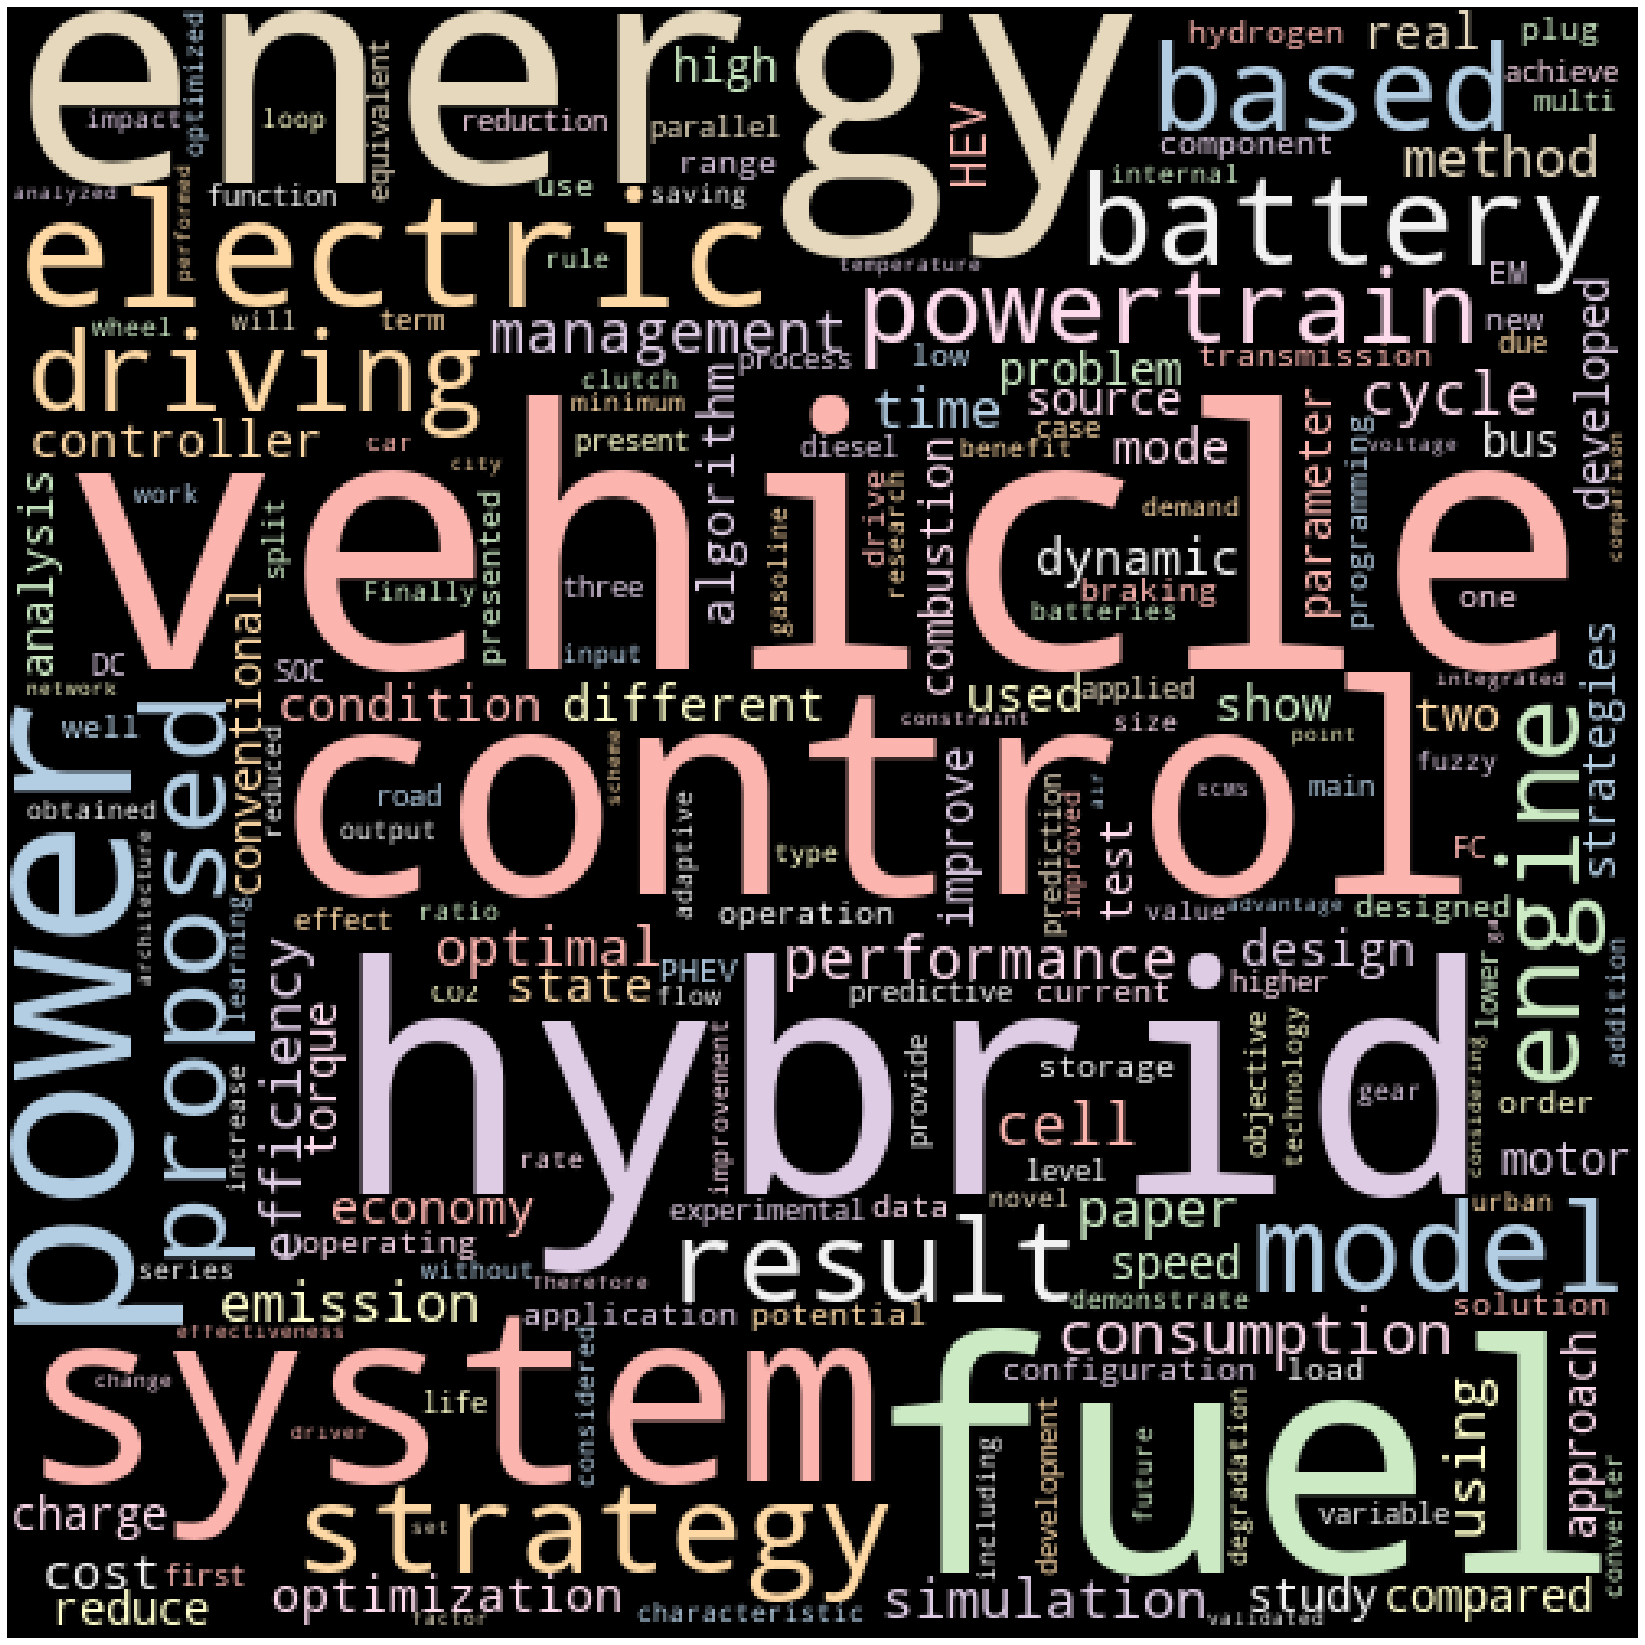

In [9]:
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
STOPWORDS.update(['Abstract','catalyst','catalysts','catalytic'])
wordcloud = WordCloud(width = 500, height = 500, random_state=1, background_color='black', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(text)
# Plot
plot_cloud(wordcloud)

In [10]:
print("Before cleaning up & lemmetization:")
print(df['Abstract'][0])

Before cleaning up & lemmetization:

                  The stringent fuel economy and emission standards enforce sport sedan and sport utility vehicle employ four-wheel-drive (4WD) hybrid powertrain to achieve better fuel economy and acceleration performance simultaneously. This paper reviews and conducts a comparative study of four 4WD hybrid configuration types: series, series-parallel, power-split and compound-split configurations. To make a fair comparison of fuel economy and acceleration performance, an integrated hierarchical optimization framework is presented, which solves the parameters sizing and energy management problem simultaneously. The pareto-front optimal design of each configuration is derived. According to detailed energy analysis, a novel multi-mode configuration is proposed by adding clutches between planetary gear nodes of compound-split configuration. By combining multiple modes, the proposed configuration achieves better fuel-saving and acceleration performance 

In [11]:
print("After cleaning up, removing stop_words & lemmetization:")
print(df['Lem data'][0])

After cleaning up, removing stop_words & lemmetization:
standard enforce sport sedan sport utility vehicle employ four-wheel-drive ( 4wd ) hybrid powertrain achieve better fuel economy acceleration performance simultaneously . paper review conduct comparative study four 4wd hybrid configuration type : series , series-parallel , power-split compound-split configuration . make fair comparison fuel economy acceleration performance , integrated hierarchical optimization framework presented , solves parameter sizing energy management problem simultaneously . pareto-front optimal design configuration derived . according detailed energy analysis , novel multi-mode configuration proposed adding clutch planetary gear node compound-split configuration . combining multiple mode , proposed configuration achieves better fuel-saving acceleration performance initial configuration . moreover , comparative study take consideration cost , control complexity off-road performance . result show power-split

In [12]:
# data contains the full text
data=df['Lem data'].to_list()
print("Data contains")
print("Amount of articles:",len(data))

Data contains
Amount of articles: 925


In [13]:
#from nltk.corpus import stopwords
#stopwords=stop_words.union(['catalyst','abstract','catalytic','Abstract','catalysts'])

In [127]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.feature_extraction import text  
vocab=400 #arbitrary
NUM_TOPICS =10
topics_list=[str(i) for i in np.arange(NUM_TOPICS)]
 
#vectorizer = TfidfVectorizer(min_df=5, max_df=0.9, ngram_range=(1, 3), max_features=500,
#                             stop_words=stopwords, lowercase=True, 
#                             token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')

nmf_vectorizer = TfidfVectorizer(min_df=5, ngram_range=(1, 3), max_features=vocab,
                             stop_words=STOPWORDS)
lda_vectorizer = CountVectorizer(min_df=5, ngram_range=(2, 4), max_features=vocab,
                             stop_words=STOPWORDS)
data_vectorized_lda = lda_vectorizer.fit_transform(data)
data_vectorized_nmf = nmf_vectorizer.fit_transform(data)
# Build a Latent Dirichlet Allocation Model
lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=500, learning_method='online')
lda_Z = lda_model.fit_transform(data_vectorized_lda)
 
# Build a Non-Negative Matrix Factorization Model
#nmf_model = NMF(n_components=NUM_TOPICS)
#nmf_Z = nmf_model.fit_transform(data_vectorized_nmf)
 
# Build a Latent Semantic Indexing Model
#lsi_model = TruncatedSVD(n_components=NUM_TOPICS)
#lsi_Z = lsi_model.fit_transform(data_vectorized)
#print(lsi_Z.shape)  # (NO_DOCUMENTS, NO_TOPICS)

 
# Let's see how the first document in the corpus looks like in different topic spaces
print(lda_Z[0])
print(nmf_Z[0])
#print(lsi_Z[0])

[0.00500189 0.00500012 0.20316931 0.00500064 0.00500083 0.00500062
 0.75682129 0.0050017  0.00500108 0.00500252]


NameError: ignored

In [39]:
matrix=0
for i in range(0,len(data)):
  row=data_vectorized_nmf[i].toarray()
  matrix+=row
print(matrix)

[[ 7.52477163 11.75551168 10.27654109 11.03405795  9.36948121  9.80254957
   9.73138742 28.32859471  8.12549419 20.30335568  9.77439846 17.80554611
  13.99668072 23.77172755 10.2668592  10.71348417  8.87749514 41.4241183
  55.59725129 10.46820582  9.27197673 15.09658795 22.07139252  9.67464953
  14.97361573 14.13379955 40.8288254   9.13163694  9.80426836 12.30870206
  19.21528193  8.98865792 10.17580949 15.42717226 11.75832459 19.42114148
  10.50466943 19.46921346  9.08366531 17.31550454 23.61162809 17.93066114
  10.28302889  9.13249488 11.58412865 35.92584101 70.95531132 25.27577563
  34.25737608 18.38344484  9.69872239 30.06804343 16.25509482 33.77694743
  15.80562588 14.43499725 11.01115191 11.50703683  9.03135905 29.57684735
  15.6863926  19.70563838 14.24404779 14.71466785 26.41608012  9.10622137
  16.84654953 10.15075117 40.22454792  8.13956987 20.85540001 11.89827432
  27.77100681 12.38608553 23.99149008 12.73365998  8.81661455 10.73986734
  31.00699897  9.37691923 45.5125966  2

In [130]:
#vectorizer, method,method_Z=lda_vectorizer, lda_model, lda_Z  # To use LDA

#vectorizer,method, method_Z=nmf_vectorizer, nmf_model, nmf_Z  # To use NMF
vectorizer=lda_vectorizer

print(vectorizer)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=400, min_df=5,
                ngram_range=(2, 4), preprocessor=None,
                stop_words={'Abstract', 'a', 'about', 'above', 'after', 'again',
                            'against', 'all', 'also', 'am', 'an', 'and', 'any',
                            'are', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', "can't", 'cannot', ...},
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)


In [122]:
df['Lem data'].iloc[1]

'f hybrid electric vehicle ( hev ) powertrains , power-split architecture major option construction hev powertrains . power-split hev powertrains best solution design-objective setting , design scheme arise better fit design requirement ? generalize system optimization different type hev powertrains , representation generation method generic architecture hev powertrain developed , completely clarify available design domain hev powertrain architecture . , integrated multi-objective optimization simultaneously optimizes architecture , component parameter , control strategy engineered obtain pareto optimal design scheme hev powertrains various situation trade-off acceleration capacity fuel economy . result suggest power-split hev powertrain superior fuel economy hev powertrain adopting architecture torque coupling among engine motor/generators ( 1-1 type ) superior acceleration capacity . however , achievable optimal fuel economy power-split 1-1 type hev powertrains almost , whereas trade

In [131]:
# Generate nodes and branches
X=0
node_source=[]
node_target=[]
node_name=[]
names = vectorizer.get_feature_names()
for i in range(0,len(data)):
  row=vectorizer.transform([df['Lem data'].iloc[i]])
  row=row.toarray()[0]
  for j in range(0,len(row)):
    if row[j]!=0:
        for k in range(j+1,len(row)):
          if row[k]!=0:
             node_source.append(j)
             node_target.append(k)
             node_name.append(names[j])
X=pd.DataFrame()
X['Source']=node_source
X['Target']=node_target
X['Label']=node_name
df2=X


In [132]:
X

Source  Target                       Label
0           23      24                 better fuel
1           23      47                 better fuel
2           23     118                 better fuel
3           23     153                 better fuel
4           23     155                 better fuel
...        ...     ...                         ...
129402     199     239         internal combustion
129403     199     280         internal combustion
129404     200     239  internal combustion engine
129405     200     280  internal combustion engine
129406     239     280                 natural gas

[129407 rows x 3 columns]

In [125]:
df2=X

In [65]:
# Black magic...
#all_text=df['Lem data'].sum()
#X=vectorizer.transform([all_text])

X=0
for i in range(0,len(data)):
  #row=data_vectorized_nmf[i].toarray()
  row=vectorizer.transform([df['Lem data'].iloc[i]])
  X+=row
Xc = (X.T * X) # This is the matrix manipulation step
Xc.setdiag(0) # We set the diagonals to be zeroes as it's pointless to be 1
names = vectorizer.get_feature_names() # This are the entity names (i.e. keywords)
df2 = pd.DataFrame(data = Xc.toarray(), columns = names, index = names)

 

In [66]:
df2.head()

based control strategy  ...  state charge soc
based control strategy                         0  ...              1173
based energy management                      805  ...              1785
battery electric vehicle                     828  ...              1836
battery state charge                        1150  ...              2550
cell hybrid electric                         575  ...              1275

[5 rows x 50 columns]

In [133]:

#  df=pd.read_csv('/content/drive/My Drive/Colab Data/Japan_XYZ_data.txt',header=None,delimiter=r"\s+")
df2.to_csv('/content/drive/My Drive/Colab Data/to gephiptek.csv', sep = ',',index=False)



In [57]:
df2

according     achieve  ...     without        work
according    0.000000   88.457541  ...   83.476559   85.499655
achieve     88.457541    0.000000  ...  130.410557  133.571123
active      77.328625  120.805999  ...  114.003498  116.766430
adaptive    83.028766  129.710997  ...  122.407062  125.373659
addition    70.503206  110.143046  ...  103.940968  106.460030
...               ...         ...  ...         ...         ...
well       114.734637  179.243229  ...  169.150168  173.249608
wheel       91.974926  143.687061  ...  135.596143  138.882384
within      63.329686   98.936274  ...   93.365242   95.627995
without     83.476559  130.410557  ...    0.000000  126.049827
work        85.499655  133.571123  ...  126.049827    0.000000

[300 rows x 300 columns]

In [111]:
juznames

['acceleration',
 'according',
 'account',
 'achieve',
 'achieved',
 'active',
 'adaptive',
 'addition',
 'advanced',
 'advantage',
 'air',
 'algorithm',
 'also',
 'alternative',
 'analysis',
 'analyzed',
 'application',
 'applied',
 'approach',
 'architecture',
 'automotive',
 'average',
 'based',
 'battery',
 'behavior',
 'benefit',
 'better',
 'braking',
 'bus',
 'capability',
 'capacity',
 'car',
 'carried',
 'case',
 'cell',
 'cell battery',
 'cell hybrid',
 'challenge',
 'change',
 'characteristic',
 'charge',
 'charging',
 'city',
 'city bus',
 'clutch',
 'co',
 'co2',
 'co2 emission',
 'combination',
 'combined',
 'combustion',
 'combustion engine',
 'comfort',
 'compared',
 'comparison',
 'component',
 'computational',
 'concept',
 'condition',
 'conducted',
 'configuration',
 'considered',
 'considering',
 'constraint',
 'consumption',
 'consumption minimization',
 'control',
 'control strategy',
 'control system',
 'controlled',
 'controller',
 'conventional',
 'converter',


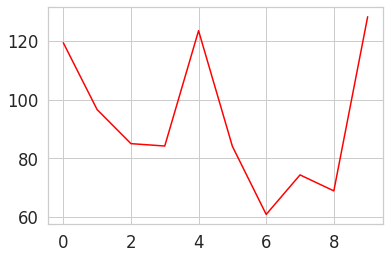

In [20]:
import seaborn as sns
#plt.plot(nmf_Z.sum(axis=0),color='blue')
plt.plot(method_Z.sum(axis=0),color='red')
#plt.plot(lsi_Z.sum(axis=0),color='green')

In [21]:
def list_top_words(i):
  single_topic=method.components_[i]
  top10_words=single_topic.argsort()[-10:][::-1]
  result=[]
  for index in top10_words:
    word=vectorizer.get_feature_names()[index]
    result.append(word)
  return result

In [22]:
dict={}
for i in range(NUM_TOPICS):
  words=list_top_words(i)
  print("Topic ",i," ",words)
  dict["Topic "+str(i)]=words

Topic  0   ['energy management strategy', 'energy storage system', 'model predictive control', 'management strategy em', 'hybrid energy storage', 'based energy management', 'simulation result show', 'optimal energy management', 'predictive control mpc', 'proposed energy management']
Topic  1   ['internal combustion engine', 'hybrid electric vehicle', 'combustion engine ice', 'based control strategy', 'combustion engine vehicle', 'fuzzy logic controller', 'simulation result indicate', 'electric vehicle ev', 'conventional internal combustion', 'energy management hybrid']
Topic  2   ['in the loop', 'power split hybrid', 'hardware in the', 'hybrid fuel cell', 'proposed control strategy', 'dynamic programming algorithm', 'regenerative braking system', 'continuously variable transmission', 'improve fuel economy', 'the loop hil']
Topic  3   ['energy management system', 'pontryagin minimum principle', 'model predictive controller', 'proton exchange membrane', 'membrane fuel cell', 'optimal con

In [23]:
dict['Topic 1']

['internal combustion engine',
 'hybrid electric vehicle',
 'combustion engine ice',
 'based control strategy',
 'combustion engine vehicle',
 'fuzzy logic controller',
 'simulation result indicate',
 'electric vehicle ev',
 'conventional internal combustion',
 'energy management hybrid']

In [24]:
# For each article, predict the topic

In [25]:
# This portion is clustering the data into a certain number of clusters
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', '@_fa', 'dc:identifier', 'dc:title',
       'link', 'load-date', 'openaccess', 'pii', 'prism:coverDate',
       'prism:doi', 'prism:publicationName', 'prism:url', 'Relevant',
       'Abstract', 'Clean text', 'Lem data'],
      dtype='object')

In [26]:
# X  is the full data vectorized and transformed into topics
X=method_Z

In [27]:
# Proceed with clustering
#from sklearn.cluster import KMeans
#import numpy as np
#kmeans = KMeans(n_clusters=NUM_TOPICS, random_state=0).fit(X) #let's optimize n_clusters by using silhouette score
#y=kmeans.predict(X)

In [28]:
# Rough method: only use the argmax of lda (pick the "main topic")
y=[np.argmax(X[i]) for i in range(0,len(X))]

In [29]:
df['Topic']=y

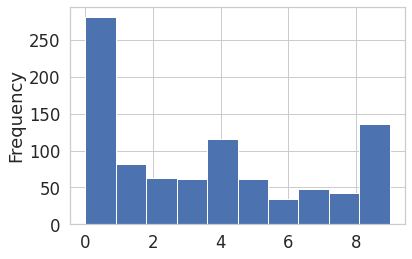

In [30]:
df['Topic'].plot(kind='hist',bins=NUM_TOPICS)

In [ ]:
# Display t-SNE to visualize the clusters

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
df.head()

Unnamed: 0  Unnamed: 0.1  @_fa                             dc:identifier  \
0           0             0  True          DOI:10.1016/j.energy.2020.118286   
1           1             1  True         DOI:10.1016/j.jclepro.2020.120711   
2           2             2  True        DOI:10.1016/j.apenergy.2020.114873   
3           3             3  True        DOI:10.1016/j.apenergy.2020.114553   
4           4             4  True  DOI:10.1016/j.mechmachtheory.2019.103731   

                                            dc:title  \
0  Comparison of four-wheel-drive hybrid powertra...   
1  Representation, generation, and optimization m...   
2  Optimal control of power-split hybrid electric...   
3  A survey of powertrain configuration studies o...   
4  Synthesis and analysis method for powertrain c...   

                                                link  \
0  {'self': 'https://api.elsevier.com/content/art...   
1  {'self': 'https://api.elsevier.com/content/art...   
2  {'self': 'https://api.elsevier.com/content/art...   
3  {'self': 'https://api.elsevier.com/content/art...   
4  {'self': 'https://api.elsevier.com/content/art...   

                  load-date  openaccess                pii prism:coverDate  \
0  2020-07-23T00:00:00.000Z       False  S0360544220313931      2020-10-15   
1  2020-02-26T00:00:00.000Z       False  S0959652620307587      2020-05-20   
2  2020-03-30T00:00:00.000Z       False  S0306261920303858      2020-05-15   
3  2020-02-15T00:00:00.000Z       False  S0306261920300659      2020-03-15   
4  2019-12-20T00:00:00.000Z       False  S0094114X19323377      2020-04-30   

                              prism:doi          prism:publicationName  \
0          10.1016/j.energy.2020.118286                         Energy   
1         10.1016/j.jclepro.2020.120711  Journal of Cleaner Production   
2        10.1016/j.apenergy.2020.114873                 Applied Energy   
3        10.1016/j.apenergy.2020.114553                 Applied Energy   
4  10.1016/j.mechmachtheory.2019.103731   Mechanism and Machine Theory   

                                           prism:url  Relevant  \
0  https://api.elsevier.com/content/article/pii/S...         2   
1  https://api.elsevier.com/content/article/pii/S...         2   
2  https://api.elsevier.com/content/article/pii/S...         3   
3  https://api.elsevier.com/content/article/pii/S...         2   
4  https://api.elsevier.com/content/article/pii/S...         2   

                                            Abstract  \
0  \n                  The stringent fuel economy...   
1  \n                  Since the first commercial...   
2  \n                  This paper presents a real...   
3  \n                  Global warming, air pollut...   
4  \n                  Existing hybrid powertrain...   

                                          Clean text  \
0  standards enforce sport sedan and sport utilit...   
1  f hybrid electric vehicle (HEV) powertrains, p...   
2  tion strategy that targets on short-term energ...   
3  depletion have accelerated the deployment of h...   
4   analysis methods mainly focus on power-split ...   

                                            Lem data  Topic  
0  standard enforce sport sedan sport utility veh...      1  
1  f hybrid electric vehicle ( hev ) powertrains ...      1  
2  tion strategy target short-term energy consump...      8  
3  depletion accelerated deployment hybrid electr...      1  
4  analysis method mainly focus power-split hybri...      8

In [ ]:
tsne = TSNE(n_components=3, verbose=1, perplexity=30, n_iter=2000)
tsne_results = tsne.fit_transform(X)
df['tsx']=tsne_results[:,0]
df['tsy']=tsne_results[:,1]
df['tsz']=tsne_results[:,2]


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 925 samples in 0.003s...
[t-SNE] Computed neighbors for 925 samples in 0.026s...
[t-SNE] Computed conditional probabilities for sample 925 / 925
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.575882
[t-SNE] KL divergence after 1750 iterations: 0.478145


In [ ]:
fig=px.scatter_3d(df,x='tsx',y='tsy',z='tsz',color='Topic',width=700,height=700,color_discrete_sequence=px.colors.qualitative.Plotly,title='T_SNE',hover_data=["Topic"])
fig.update_traces(mode='markers',marker_line_width=2,marker_size=5)

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=500)
tsne_results = tsne.fit_transform(X)
df['tsx']=tsne_results[:,0]
df['tsy']=tsne_results[:,1]

px.scatter(df,x='tsx',y='tsy',color='Topic',width=700,height=700,color_discrete_sequence=px.colors.qualitative.Plotly,title='T_SNE')

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 925 samples in 0.001s...
[t-SNE] Computed neighbors for 925 samples in 0.038s...
[t-SNE] Computed conditional probabilities for sample 925 / 925
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.320015
[t-SNE] KL divergence after 500 iterations: 0.523487


In [ ]:
df['Year'] = pd.to_datetime(df['load-date']).dt.year
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

In [ ]:
# Keep only between 2000 and 2019 included
#df2=df[(df['Year']>=pd.to_datetime(2014,format='%Y') & (df['Year']<=pd.to_datetime(2019,format='%Y')]
df2=df[(df['Year']>='2010-01-01')] #& (df['Year']<='2019-12-31')]
#df['year2'] = pd.to_datetime(df['Year'], format='%Y')

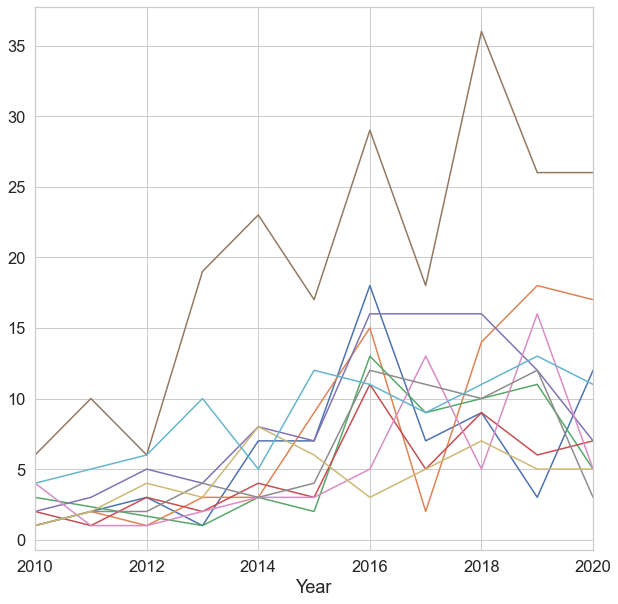

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=10,10

topics=df2['Topic'].unique()
all_topics=pd.DataFrame()
for topic in topics:
    filter=df2[df2['Topic']==topic].groupby('Year')['Topic'].count()
    filter.plot()
    all_topics[topic]=filter
all_topics.index=pd.to_datetime(all_topics.index)
# Rename Topic columns to str
all_topics.columns=all_topics.columns.astype(str)

In [ ]:
#Calculate topic variation per year
topic_variation=all_topics.diff()

In [ ]:
# Sum only last 3 years
new_topics=topic_variation[-2:].sum().sort_values(ascending=False)
Top5_topics=new_topics[0:5].index.to_list()
print(Top5_topics)

['8', '1', '4', '7', '2']


Topic  8   ['energy management strategy', 'model predictive control', 'power split hybrid', 'management strategy em', 'based energy management', 'proposed energy management', 'power management strategy', 'predictive control mpc', 'management strategy proposed', 'split hybrid electric']
Topic  1   ['hybrid electric vehicle', 'electric vehicle hevs', 'electric vehicle hev', 'parallel hybrid electric', 'better fuel economy', 'improve fuel economy', 'reduce fuel consumption', 'waste heat recovery', 'fuel economy hybrid', 'simulation experimental result']
Topic  4   ['fuel cell battery', 'fuel cell hybrid', 'fuel cell system', 'dc dc converter', 'hybrid power system', 'fuel cell vehicle', 'proton exchange membrane', 'pem fuel cell', 'membrane fuel cell', 'exchange membrane fuel']
Topic  7   ['energy storage system', 'hybrid energy storage', 'dynamic programming algorithm', 'multi objective optimization', 'of the art', 'state of the', 'real driving cycle', 'fuel cell fc', 'hybrid electric po

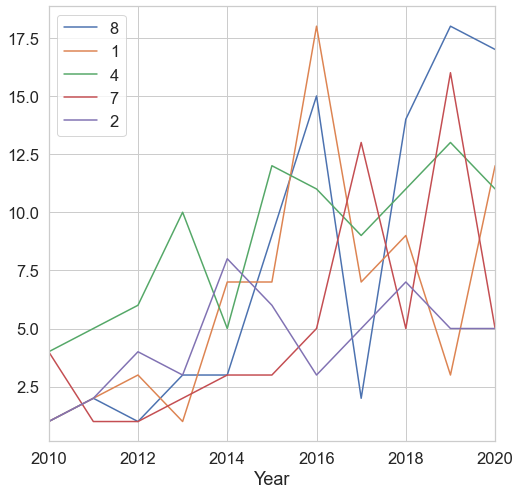

In [ ]:
Top5_topics_int=[int(i) for i in Top5_topics]
plt.rcParams["figure.figsize"]=8,8
for i in Top5_topics_int:
  words=list_top_words(i)
  all_topics[str(i)].plot(label=i)
  print("Topic ",i," ",words)
plt.legend()

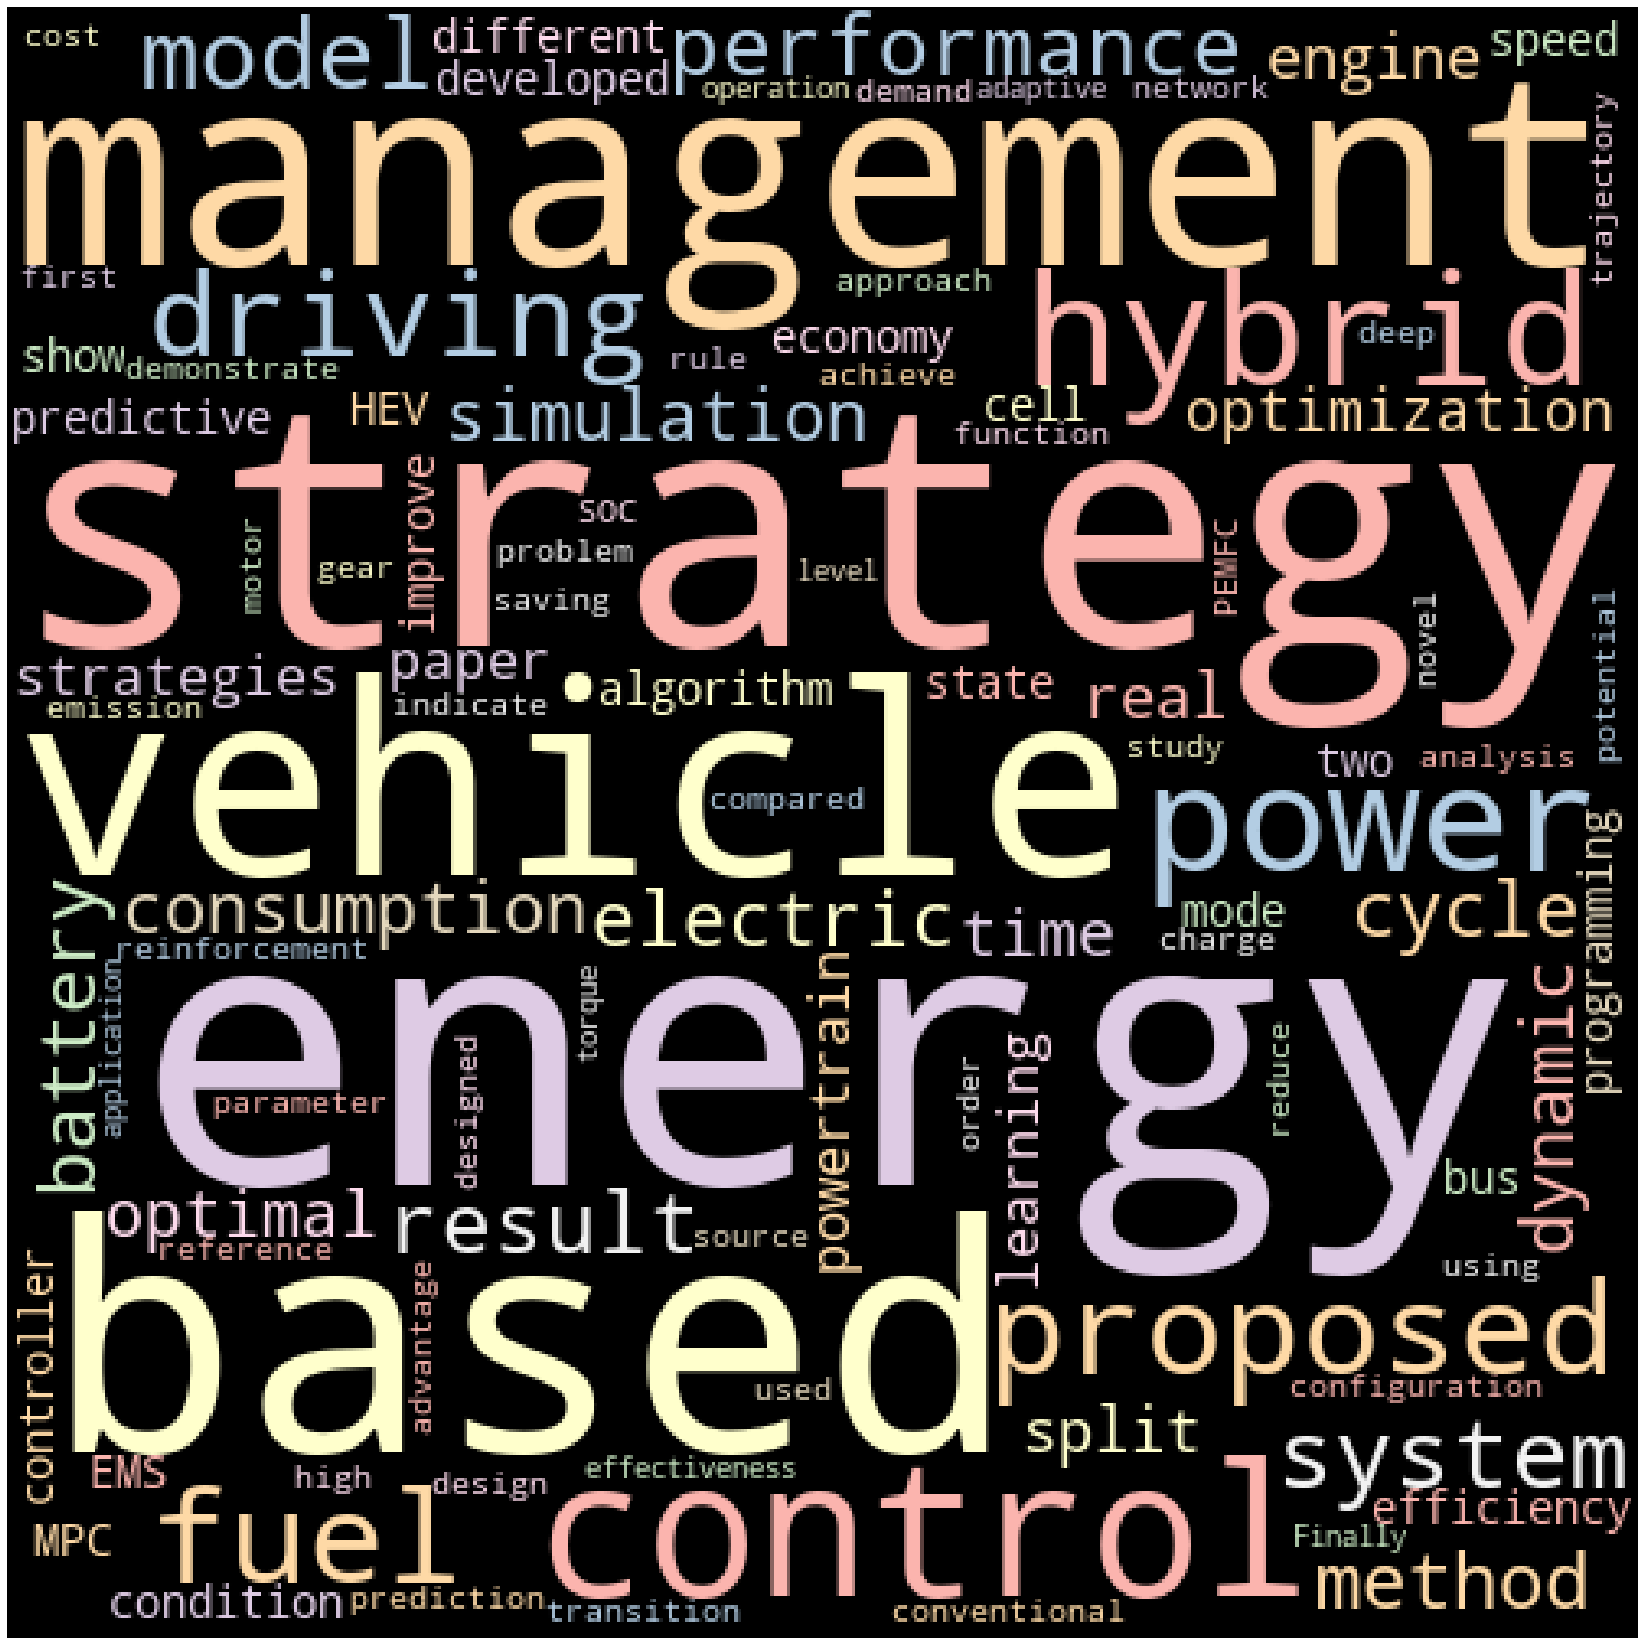

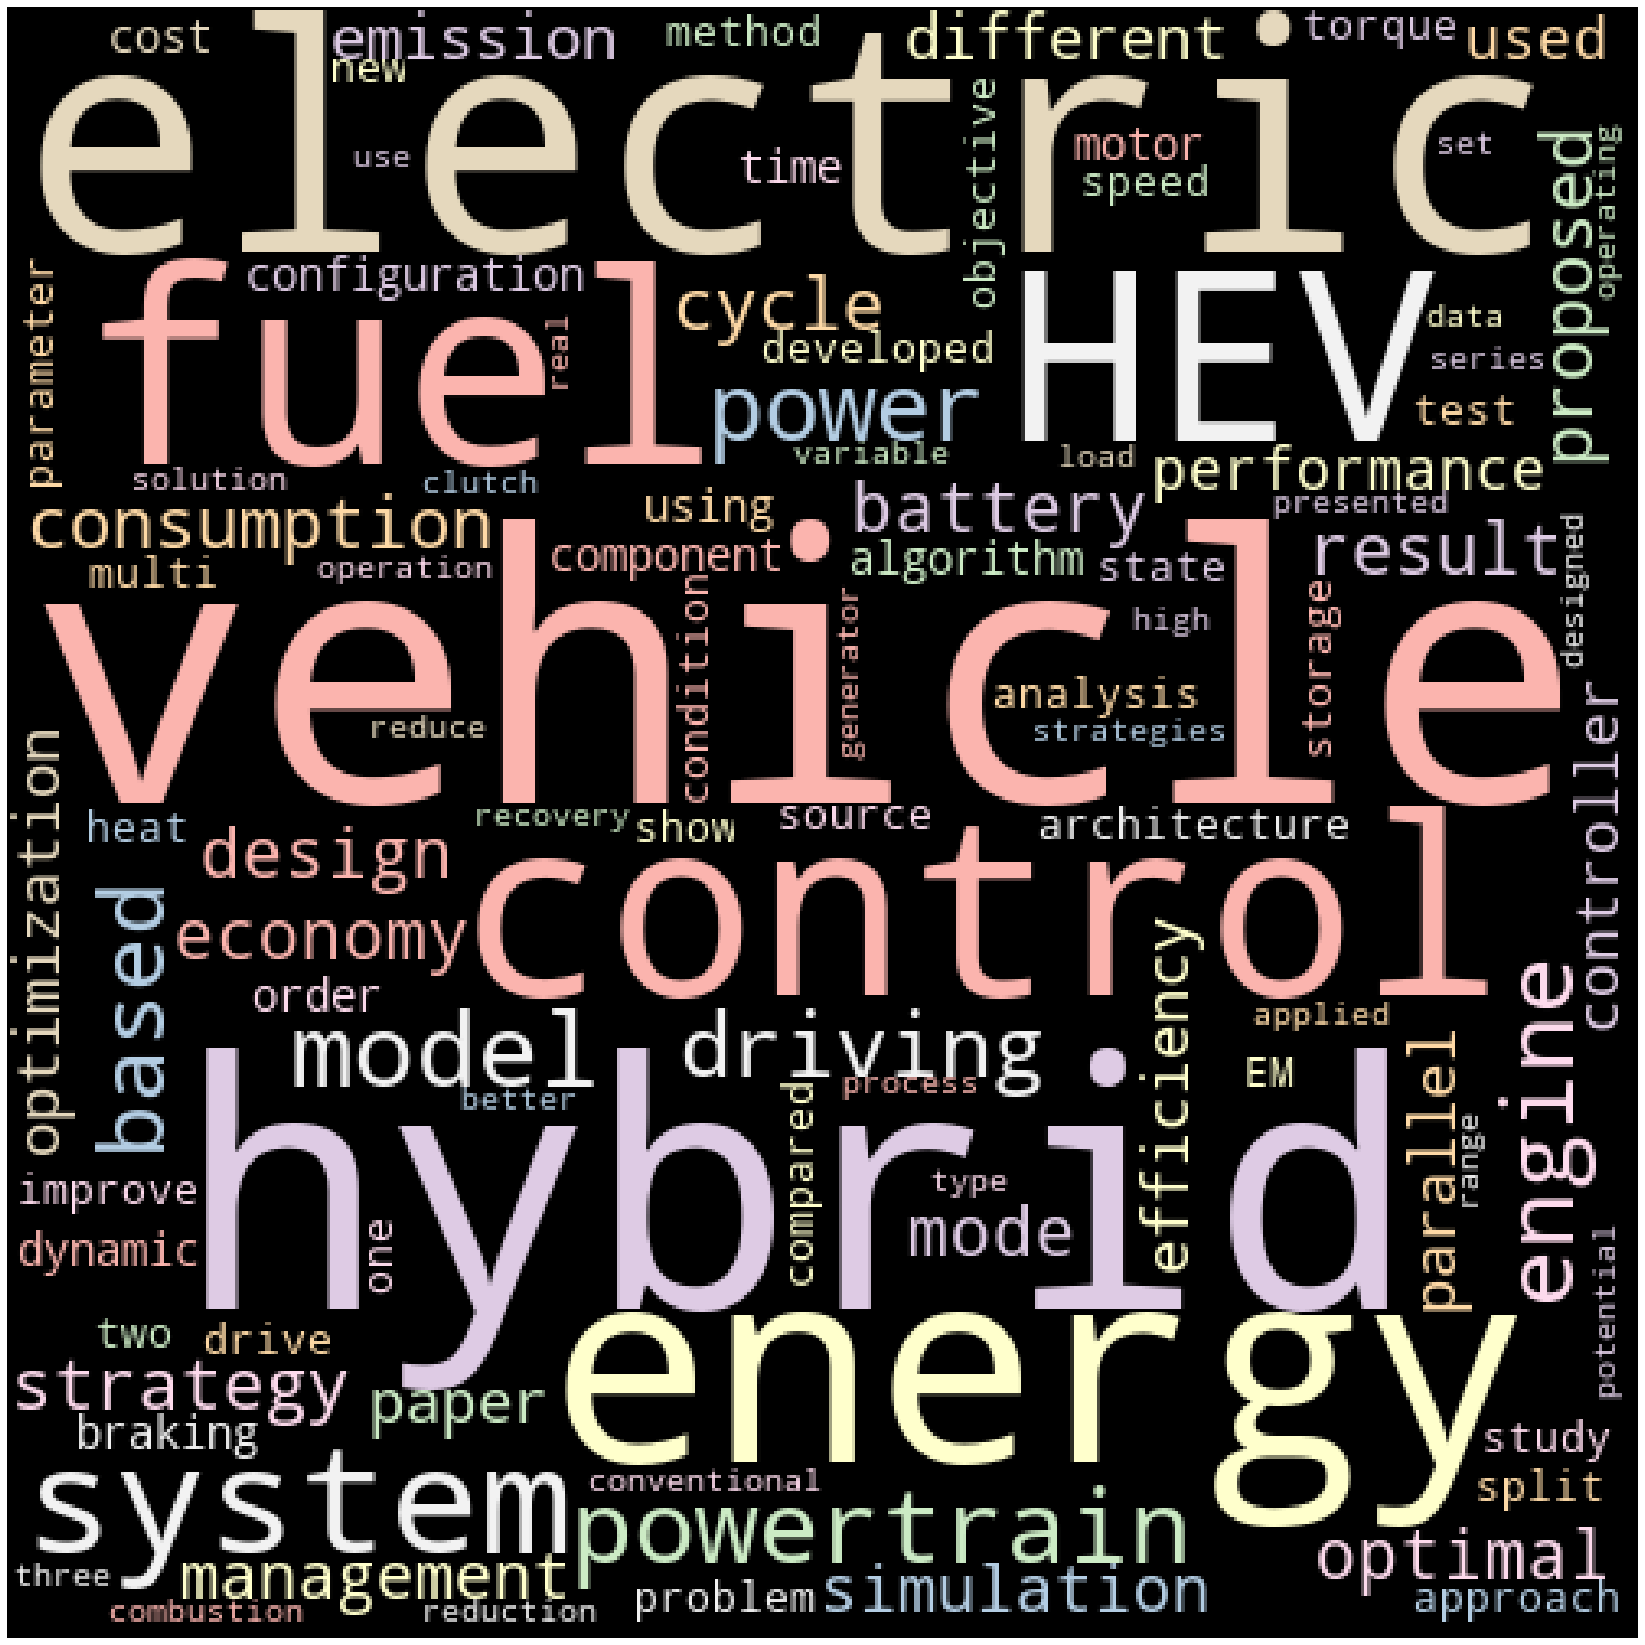

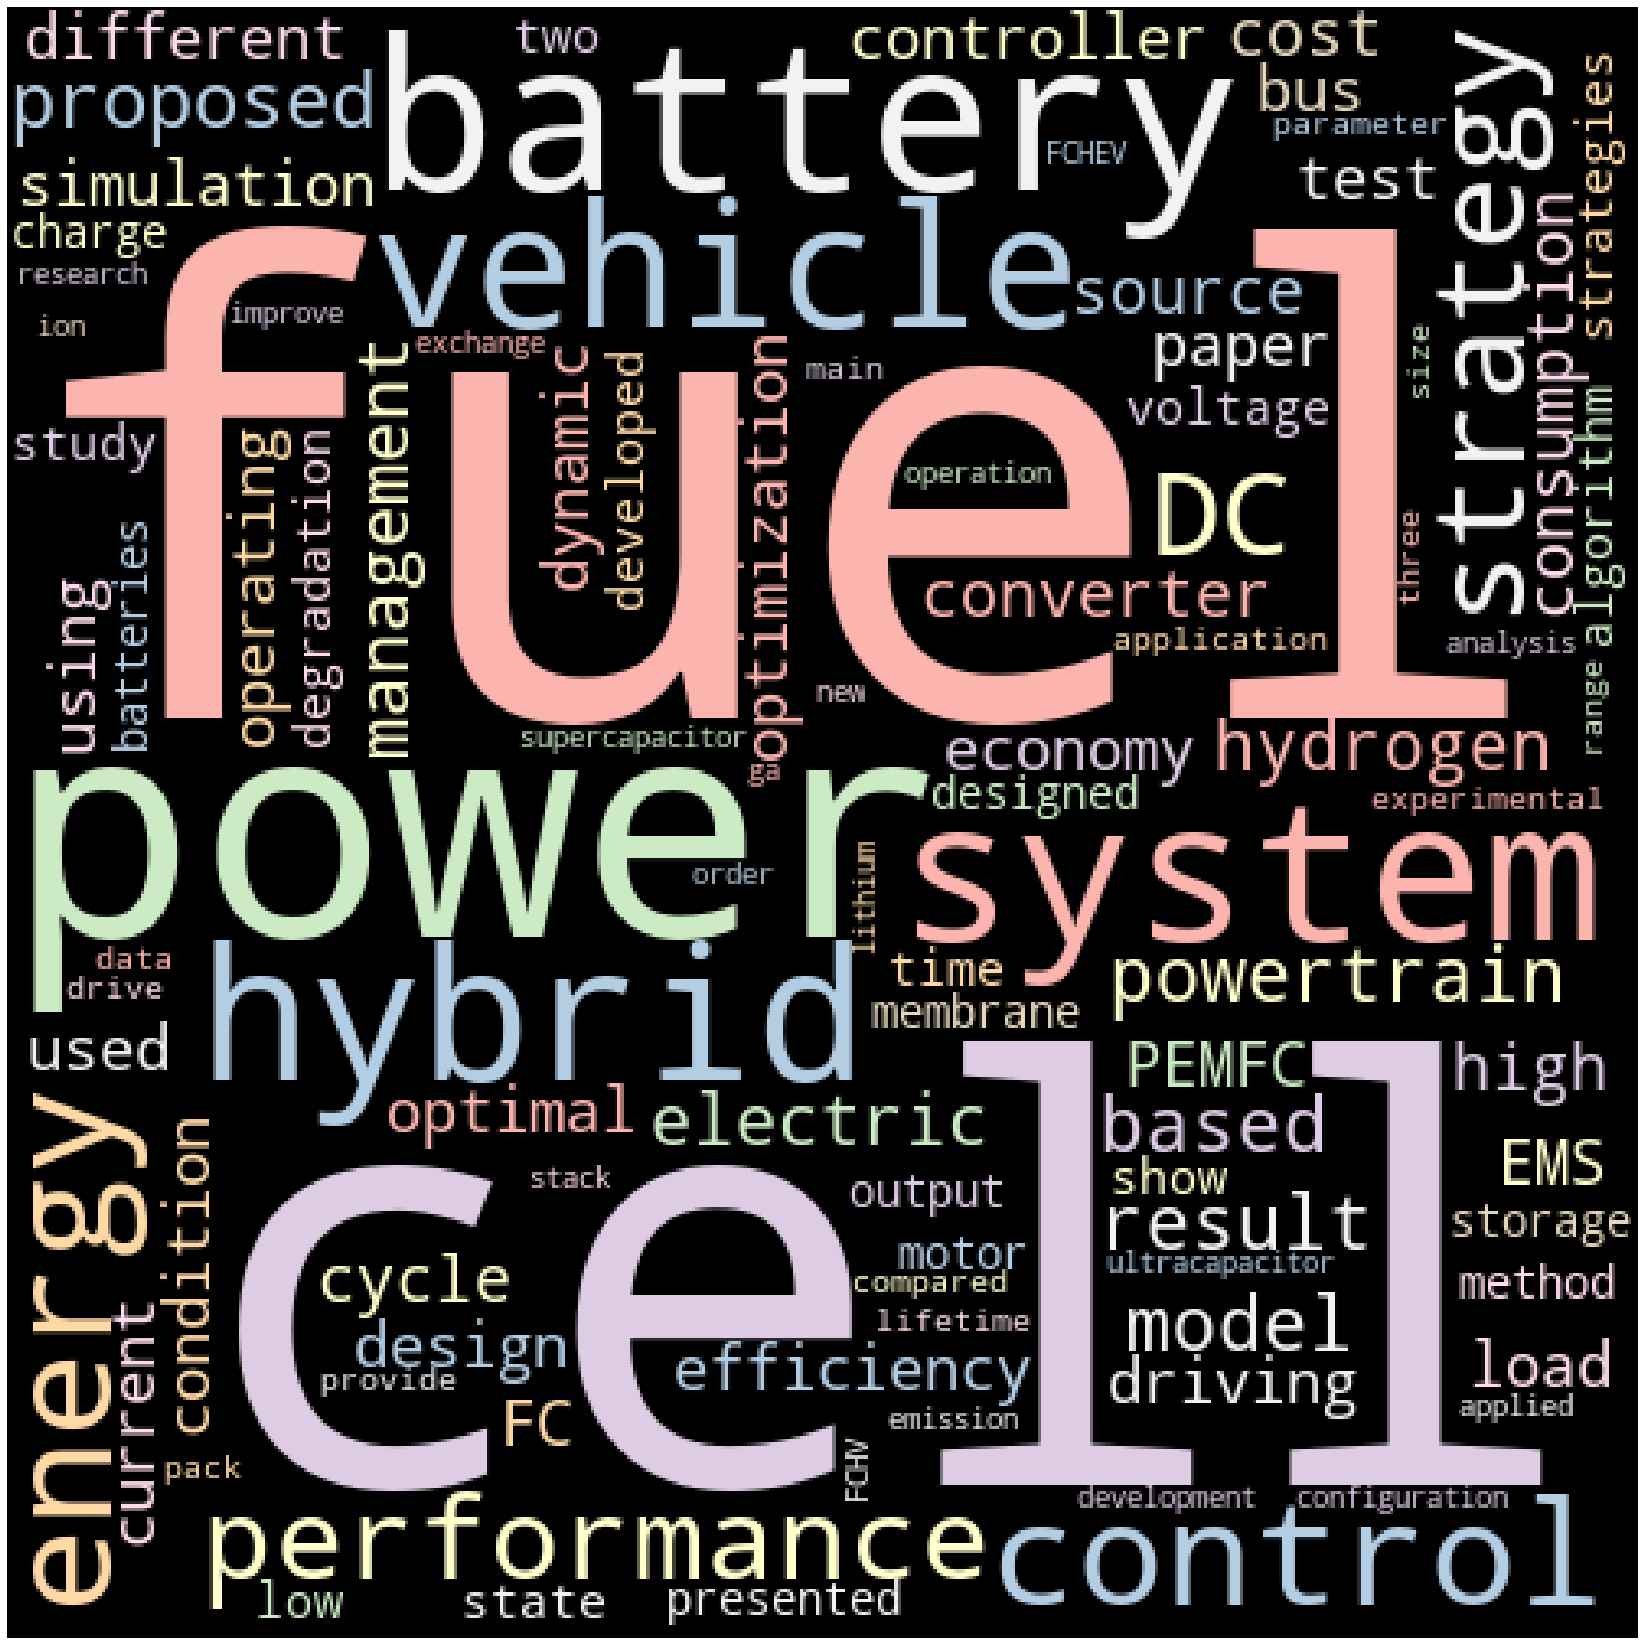

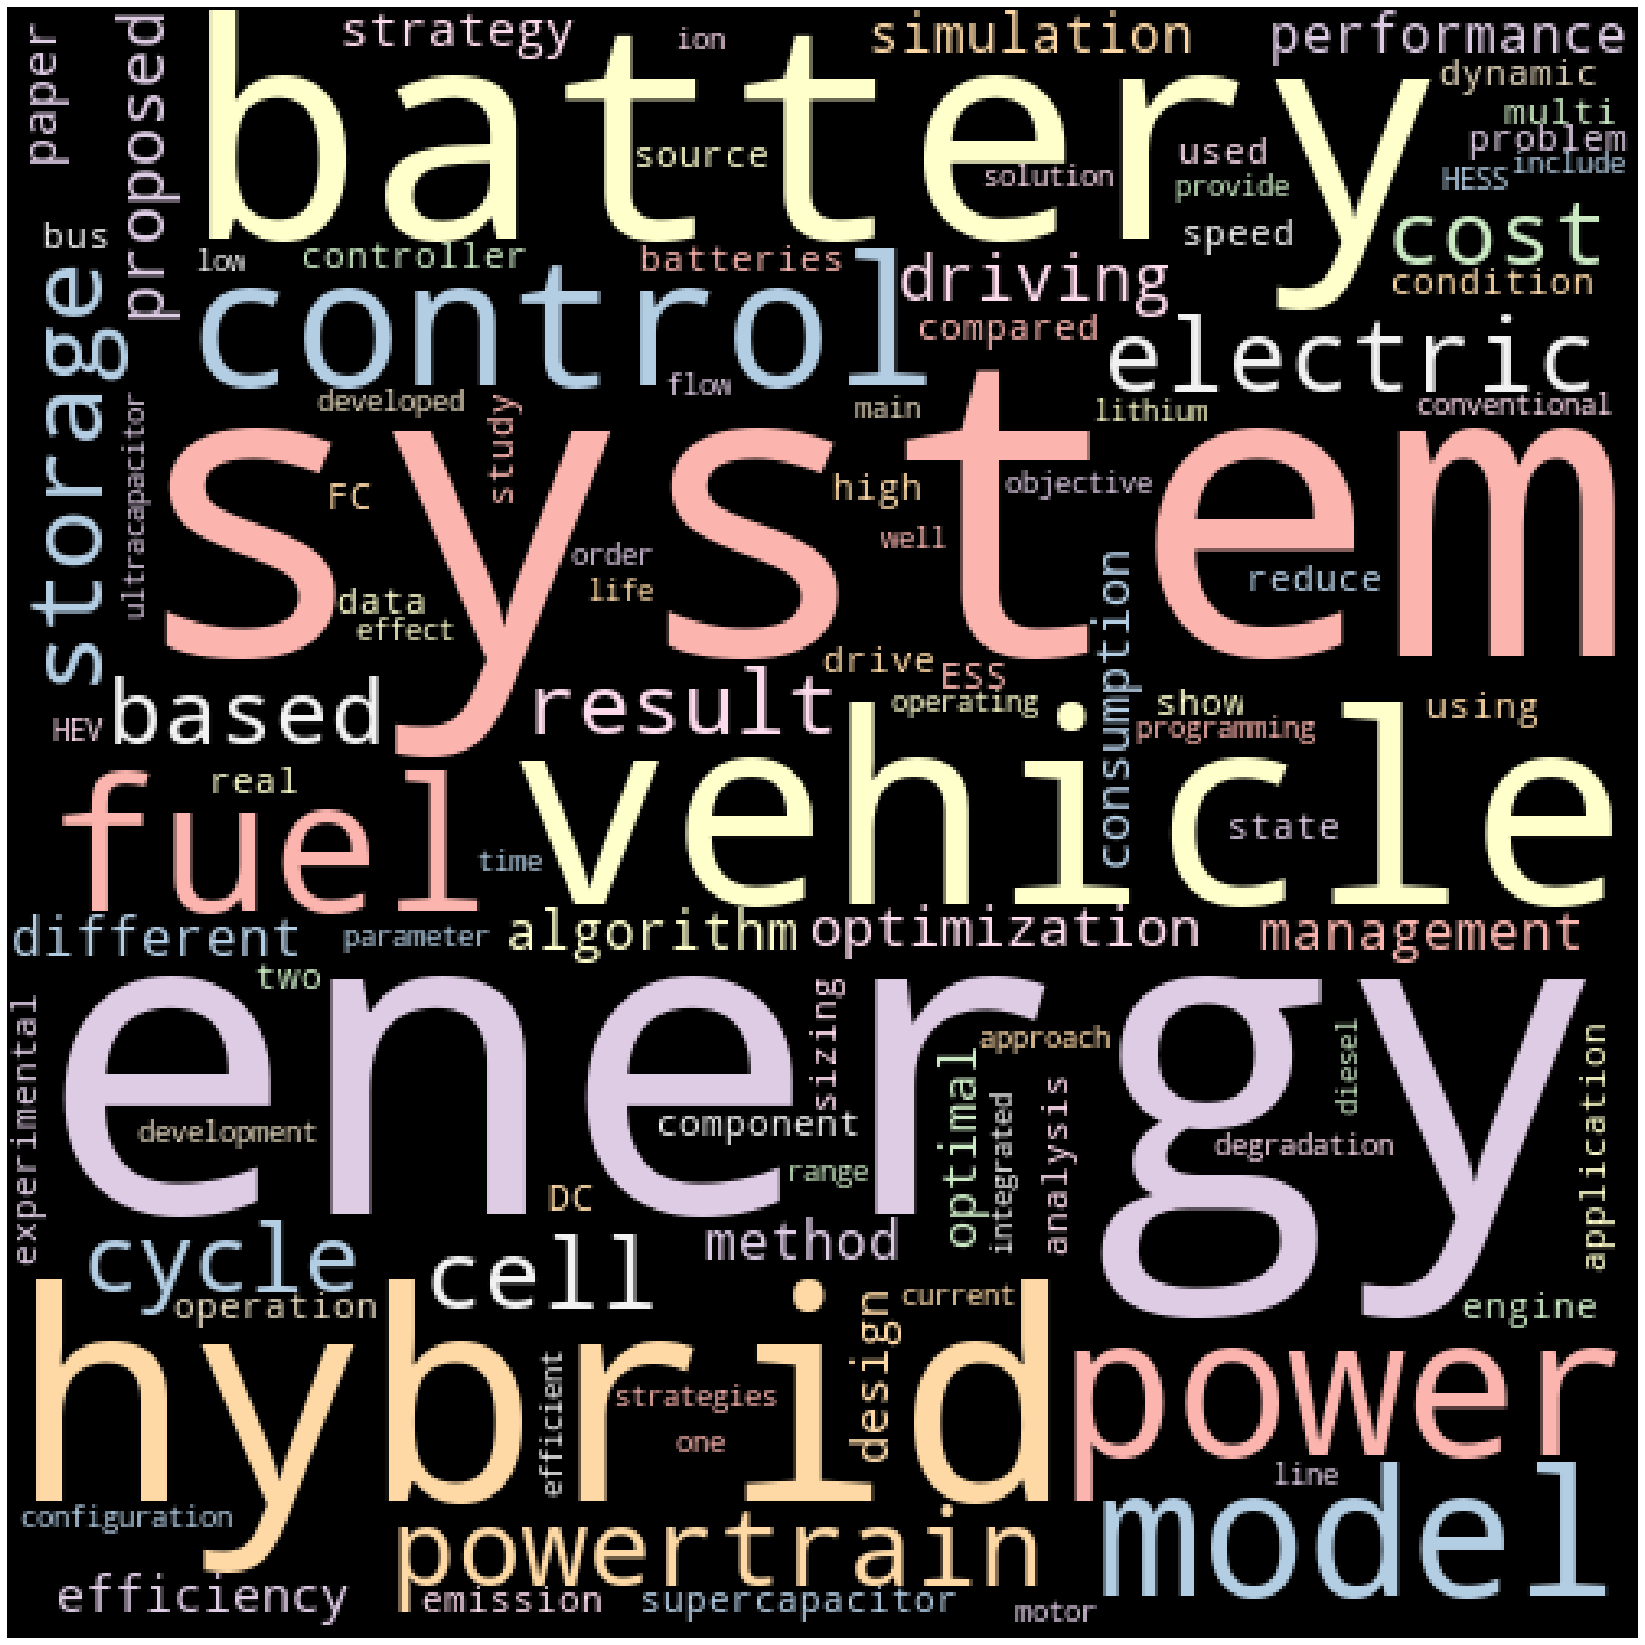

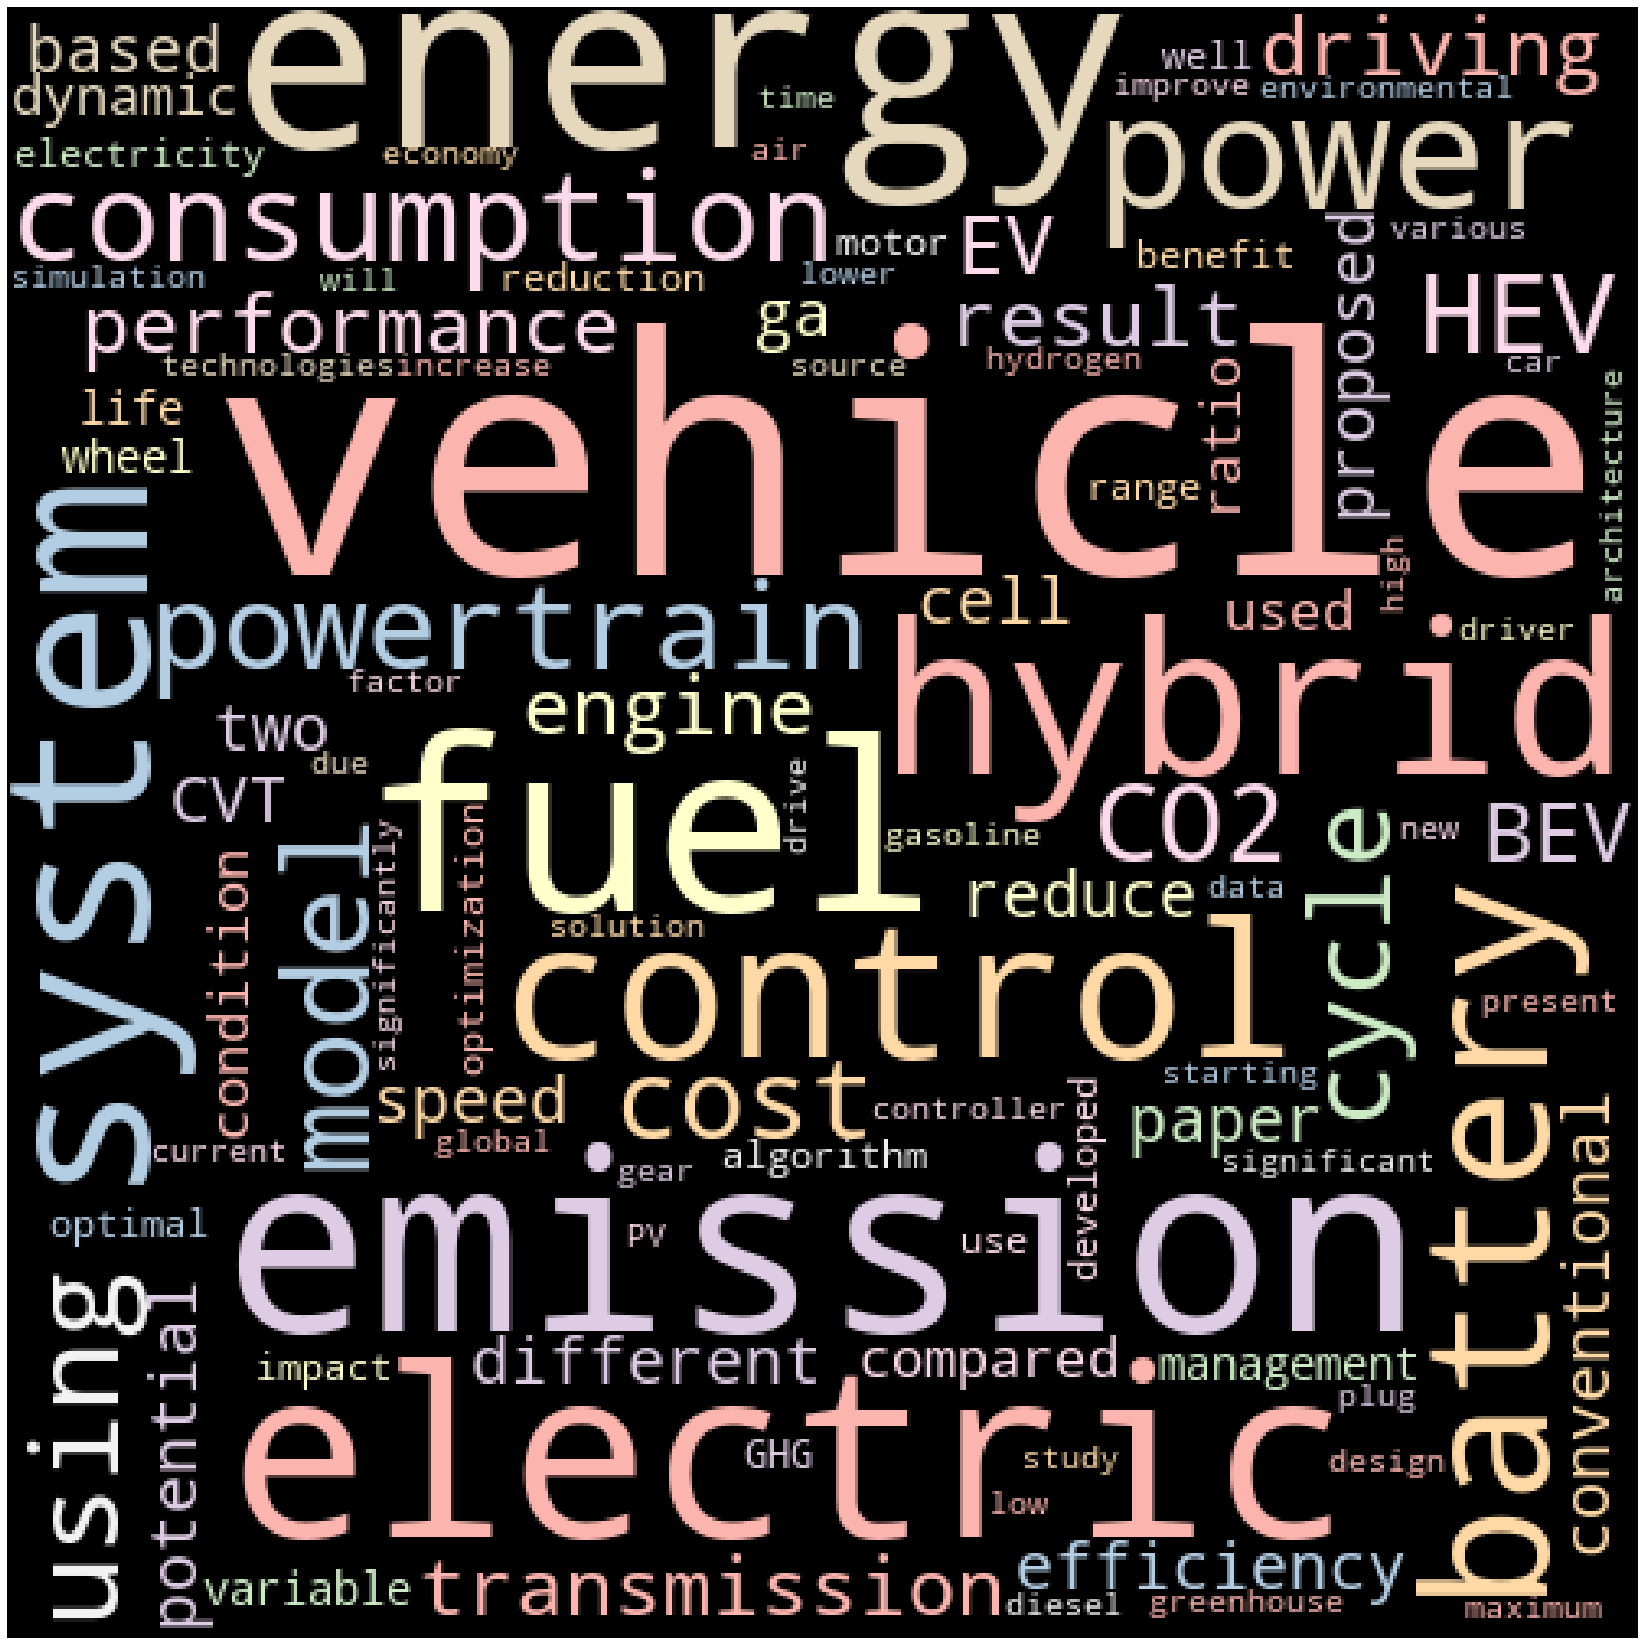

In [ ]:
# Plot Worcloud for topic i

for i in Top5_topics_int:
    df2=df[df['Topic']==i]
    text=df2['Clean text'].sum()
    wordcloud = WordCloud(max_words=100,width = 500, height = 500, random_state=1, background_color='black', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(text)
    # Plot
    plot_cloud(wordcloud)


In [ ]:
# Approach no 2
# Transform all according to LDA
# Then plot it by year


In [ ]:
topics_list

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [ ]:
for i in range(len(topics_list)):
    df["lda "+topics_list[i]]=lda_Z[:,i]

In [ ]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', '@_fa', 'dc:identifier', 'dc:title',
       'link', 'load-date', 'openaccess', 'pii', 'prism:coverDate',
       'prism:doi', 'prism:publicationName', 'prism:url', 'Relevant',
       'Abstract', 'Clean text', 'Lem data', 'Topic', 'tsx', 'tsy', 'tsz',
       'Year', 'lda 0', 'lda 1', 'lda 2', 'lda 3', 'lda 4', 'lda 5', 'lda 6',
       'lda 7', 'lda 8', 'lda 9'],
      dtype='object')

In [ ]:
df

Unnamed: 0  Unnamed: 0.1  @_fa                             dc:identifier  \
0             0             0  True          DOI:10.1016/j.energy.2020.118286   
1             1             1  True         DOI:10.1016/j.jclepro.2020.120711   
2             2             2  True        DOI:10.1016/j.apenergy.2020.114873   
3             3             3  True        DOI:10.1016/j.apenergy.2020.114553   
4             4             4  True  DOI:10.1016/j.mechmachtheory.2019.103731   
5             5             5  True          DOI:10.1016/j.energy.2020.117039   
6             6             6  True        DOI:10.1016/j.enconman.2020.113320   
7             7             7  True            DOI:10.1016/j.rser.2019.109596   
8             8             8  True          DOI:10.1016/j.energy.2019.115957   
9             9             9  True          DOI:10.1016/j.energy.2019.116008   
10           10            10  True        DOI:10.1016/j.ijhydene.2019.09.005   
11           11            11  True           DOI:10.1016/j.ymssp.2018.10.033   
12           12            12  True        DOI:10.1016/j.enconman.2019.111987   
13           13            13  True  DOI:10.1016/j.mechmachtheory.2019.103630   
14           14            14  True          DOI:10.1016/j.energy.2019.06.115   
15           15            15  True             DOI:10.1016/j.est.2018.04.011   
16           16            16  True         DOI:10.1016/j.jclepro.2018.11.065   
17           17            17  True        DOI:10.1016/j.apenergy.2018.01.070   
18           18            18  True          DOI:10.1016/j.energy.2019.04.110   
19           19            20  True           DOI:10.1016/j.ymssp.2018.10.027   
20           20            21  True        DOI:10.1016/j.jpowsour.2018.11.027   
21           21            22  True        DOI:10.1016/j.ijhydene.2020.02.181   
22           22            24  True             DOI:10.1016/j.trd.2020.102354   
23           23            26  True       DOI:10.1016/j.jfranklin.2017.12.039   
24           24            27  True           DOI:10.1016/j.ymssp.2016.12.029   
25           25            30  True        DOI:10.1016/j.ijhydene.2018.11.039   
26           26            32  True        DOI:10.1016/j.apenergy.2017.08.201   
27           27            33  True         DOI:10.1016/j.tranpol.2020.04.018   
28           28            35  True            DOI:10.1016/j.rser.2016.09.109   
29           29            36  True          DOI:10.1016/j.ifacol.2019.09.095   
..          ...           ...   ...                                       ...   
895         906          2476  True            DOI:10.1016/j.fuel.2015.03.070   
896         907          2485  True      DOI:10.1016/j.automatica.2013.05.014   
897         908          2507  True           DOI:10.1016/j.ymssp.2015.09.017   
898         909          2515  True    DOI:10.1016/j.mechatronics.2016.11.002   
899         910          2536  True       DOI:10.1016/j.arcontrol.2014.09.006   
900         911          2537  True           DOI:10.1016/j.ymssp.2014.12.026   
901         912          2538  True          DOI:10.1016/j.ifacol.2016.08.074   
902         913          2557  True     DOI:10.1016/j.measurement.2018.01.047   
903         914          2561  True        DOI:10.1016/j.ijhydene.2012.11.105   
904         915          2576  True        DOI:10.1016/j.atmosenv.2010.04.046   
905         916          2588  True        DOI:10.1016/j.jprocont.2016.01.005   
906         917          2597  True      DOI:10.1016/B978-075065092-2/50007-9   
907         918          2612  True  DOI:10.1016/j.mechmachtheory.2014.10.007   
908         919          2656  True       DOI:10.1016/j.jfranklin.2017.10.031   
909         920          2672  True      DOI:10.1016/j.automatica.2013.09.032   
910         921          2688  True            DOI:10.1016/j.nahs.2015.10.001   
911         922          2716  True          DOI:10.1016/j.ifacol.2015.09.446   
912         923          2723  True 

In [ ]:
DF=df.groupby('Year').sum()
DF=DF[(DF.index>'2000-01-01')]# & (DF.index<'2019-12-31')]

In [ ]:
f=DF[['lda '+str(i) for i in range(0,len(topics_list))]]
f['Year']=f.index
f['Year']=f['Year'].dt.year
g=f.melt(id_vars=['Year'])
px.bar(g,y='value',x='Year',color='variable',barmode='overlay')

In [ ]:
dict['Topic 2']

['internal combustion engine',
 'hybrid electric vehicle',
 'combustion engine ice',
 'combustion engine vehicle',
 'cell electric vehicle',
 'fuel cell electric',
 'fuel consumption emission',
 'consumption co2 emission',
 'conventional internal combustion',
 'battery electric vehicle']

In [ ]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', '@_fa', 'dc:identifier', 'dc:title',
       'link', 'load-date', 'openaccess', 'pii', 'prism:coverDate',
       'prism:doi', 'prism:publicationName', 'prism:url', 'Relevant',
       'Abstract', 'Clean text', 'Lem data', 'Topic', 'tsx', 'tsy', 'tsz',
       'Year', 'lda 0', 'lda 1', 'lda 2', 'lda 3', 'lda 4', 'lda 5', 'lda 6',
       'lda 7', 'lda 8', 'lda 9', 'lda 10', 'lda 11', 'lda 12', 'lda 13',
       'lda 14'],
      dtype='object')

In [ ]:
# List recent publications for Top3 topics

In [ ]:
sort='lda 14'
top_index=df[sort].sort_values(ascending=False).index

In [ ]:
df.loc[top_index[0:10]]['dc:title'].values

array(['Real-time optimal energy management strategy for a dual-mode power-split hybrid electric vehicle based on an explicit model predictive control algorithm',
       'Energy management for a power-split hybrid electric bus via deep reinforcement learning with terrain information',
       'Performance analysis of a novel coaxial power-split hybrid powertrain using a CNG engine and supercapacitors',
       'Battery aging- and temperature-aware predictive energy management for hybrid electric vehicles',
       'Continuous reinforcement learning of energy management with deep Q network for a power split hybrid electric bus',
       'Rule based energy management strategy for a series–parallel plug-in hybrid electric bus optimized by dynamic programming',
       'A comprehensive analysis of energy management strategies for hybrid electric vehicles based on bibliometrics',
       'Predictive energy management of fuel cell supercapacitor hybrid construction equipment',
       'Mode shift m

In [ ]:
df[df['lda 4']>0.95]['Abstract']

34     Development and deployment of low carbon infra...
40     Copper is widely used in buildings, transporta...
41     The global exponential increase in annual phot...
46     \n                  To date, a limited number ...
56     \n                  This study considers the f...
61     \n                  Waste an E-waste is a glob...
64     \n                  This paper discusses the e...
88     \n                  Circularity can help to pr...
101    \n                  Traditional linear product...
102    Slowing and closing loop strategies have the u...
103    \n                  In previous years, numerou...
115    Circular measures such as long-life designs, r...
119    \n                  An analysis of the copper ...
126    \n                  The comprehensive optimiza...
132    \n                  Electronic waste (e-waste ...
133    \n                  The quantitative demand fo...
141    \n                  Building a circular econom...
152    Remanufacturing can boos

In [ ]:
df.iloc[34]['Abstract']

'\n                  Circular Economy (CE) turned into one of the most popular topics worldwide for presenting itself as the solution to problems linked to the traditional “take-make-consume-dispose” system. But, how can CE be addressed as public policies worldwide? While there are ambitious and committed strategies in the European Union and Asia, the path that emerging economies are taking is poorly researched. Therefore, we selected Colombia, a Latin American country which is beginning to implement new public policies that are on par with global concerns. Furthermore, its waste management panorama has been transformed in recent decades due to its legal framework restructuring, differently than others in the region. This article aimed to elucidate which drivers have influenced the waste management policies in Colombia based on its historical context and how these drivers impacted Municipal Waste Management (MWM) systems. Amongst the principal drivers identified, we highlight “financia

In [ ]:
topics_variation=DF[topics_list].diff()

KeyError: "None of [Index(['0', '1', '2', '3', '4'], dtype='object')] are in the [columns]"

In [ ]:
topics_variation.plot()

NameError: name 'topics_variation' is not defined

In [ ]:
# Sum only last 3 years
new_topics=topics_variation[-3:].sum().sort_values(ascending=False)
Top5_topics=new_topics[0:5].index.to_list()
print(Top5_topics)

NameError: name 'topics_variation' is not defined

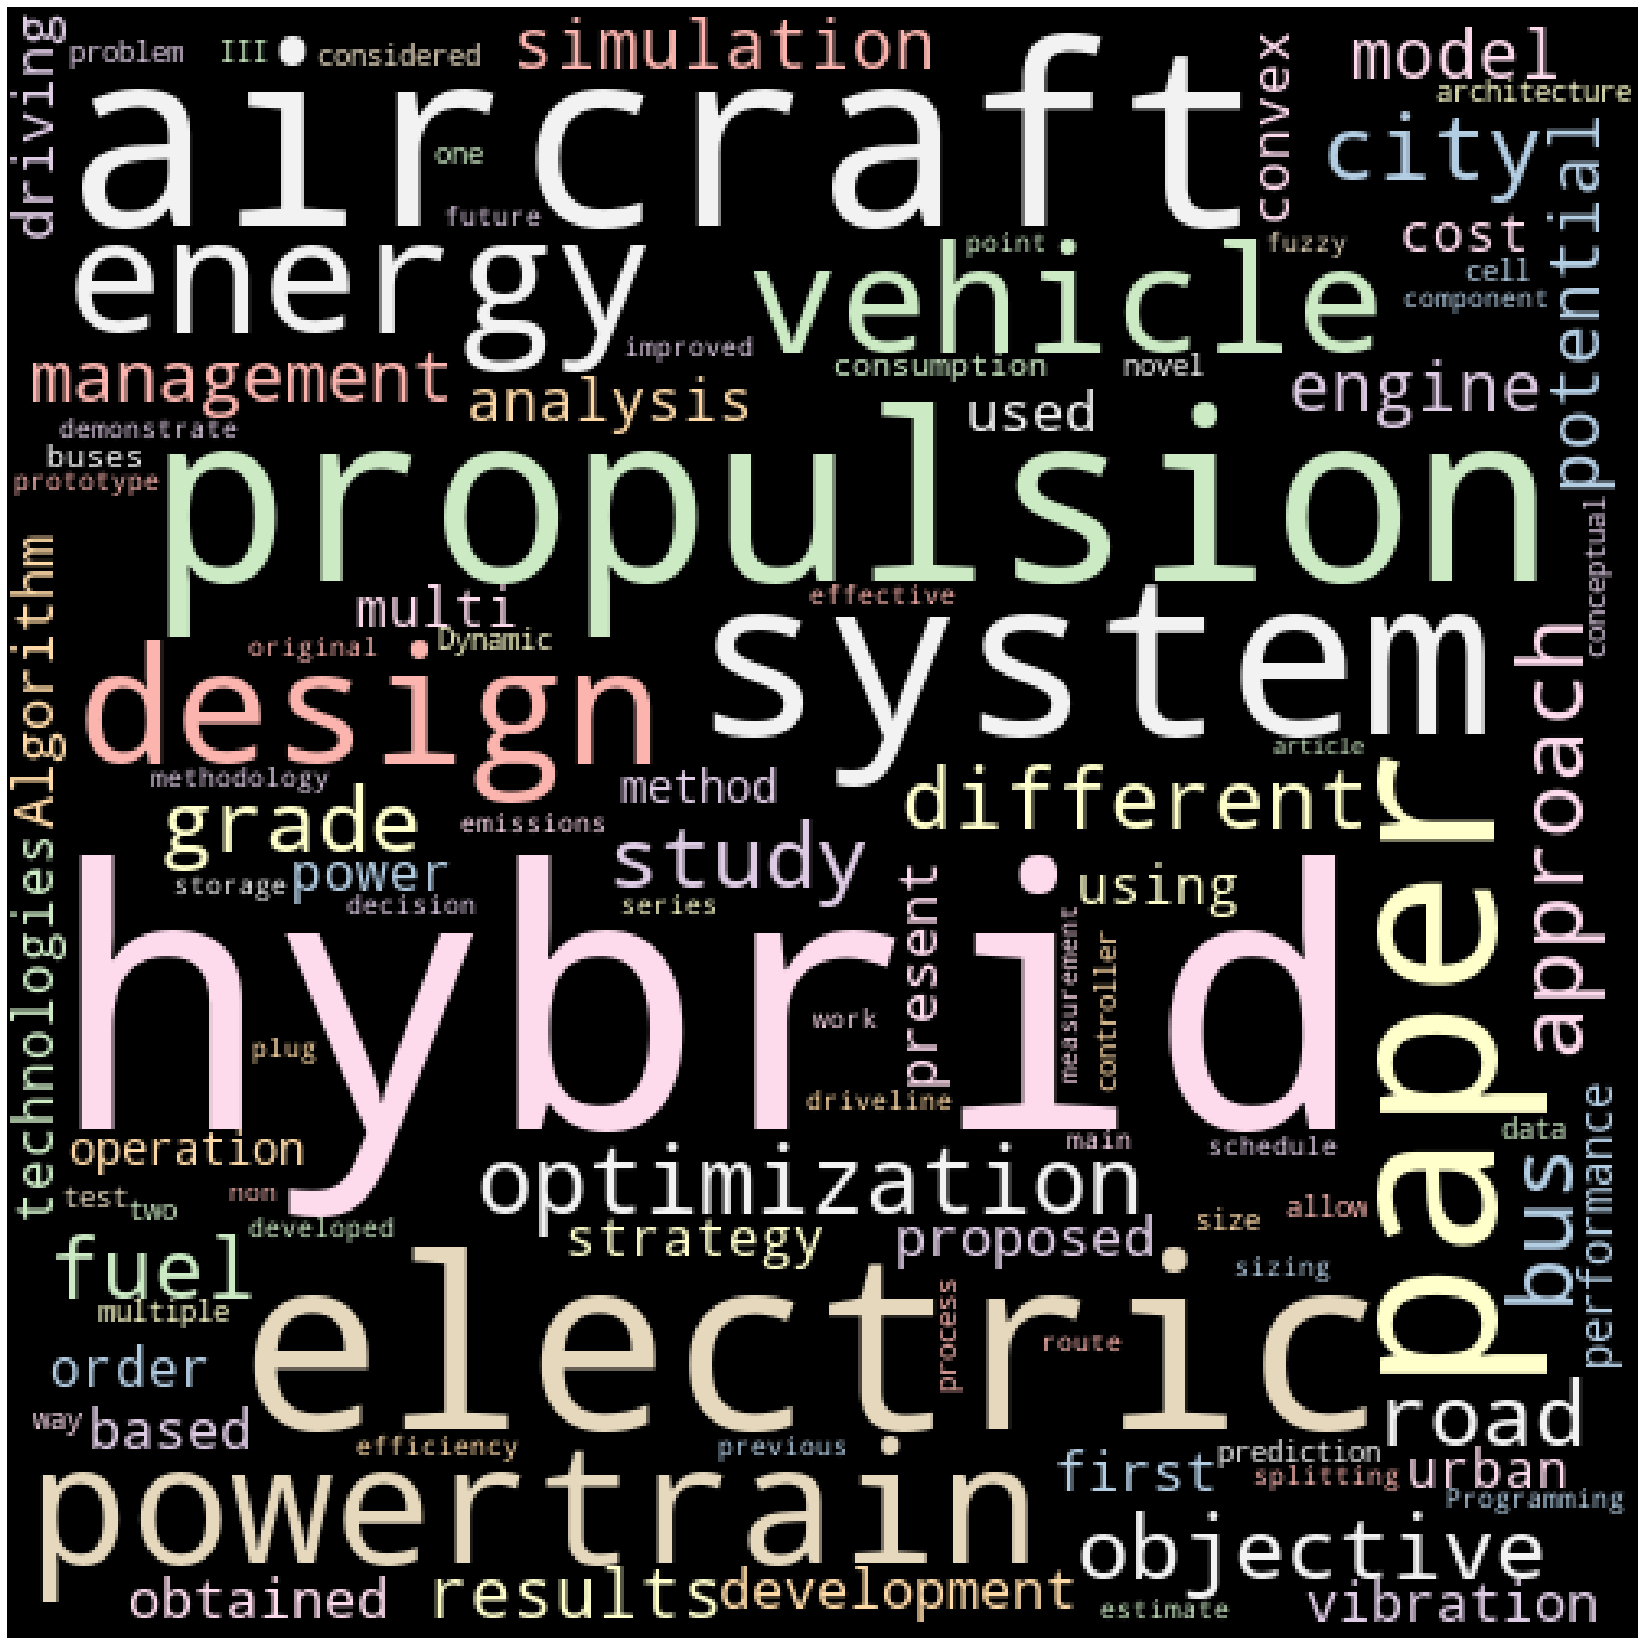

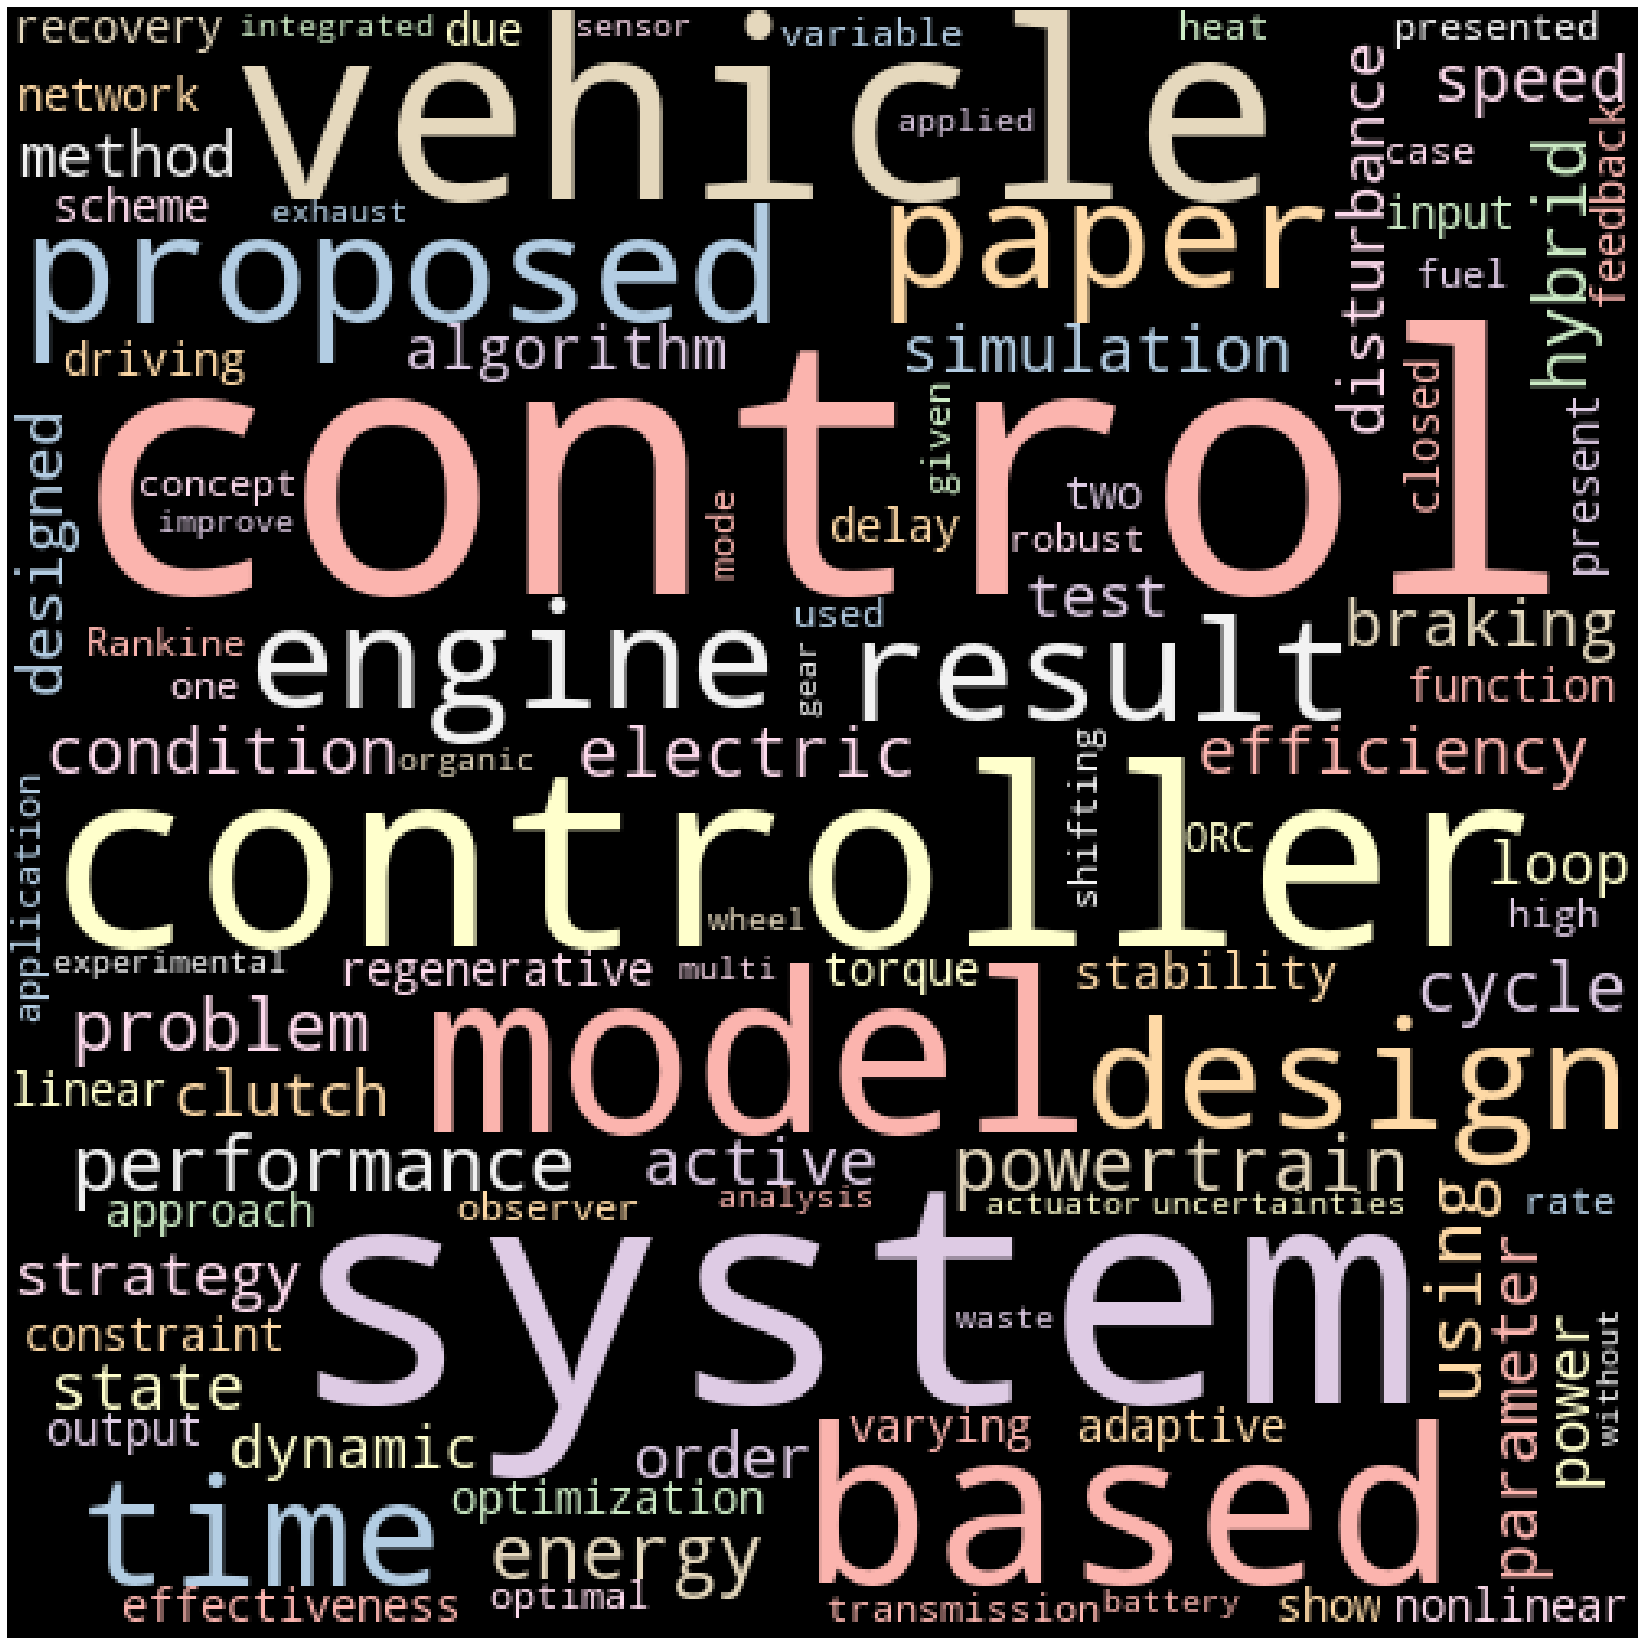

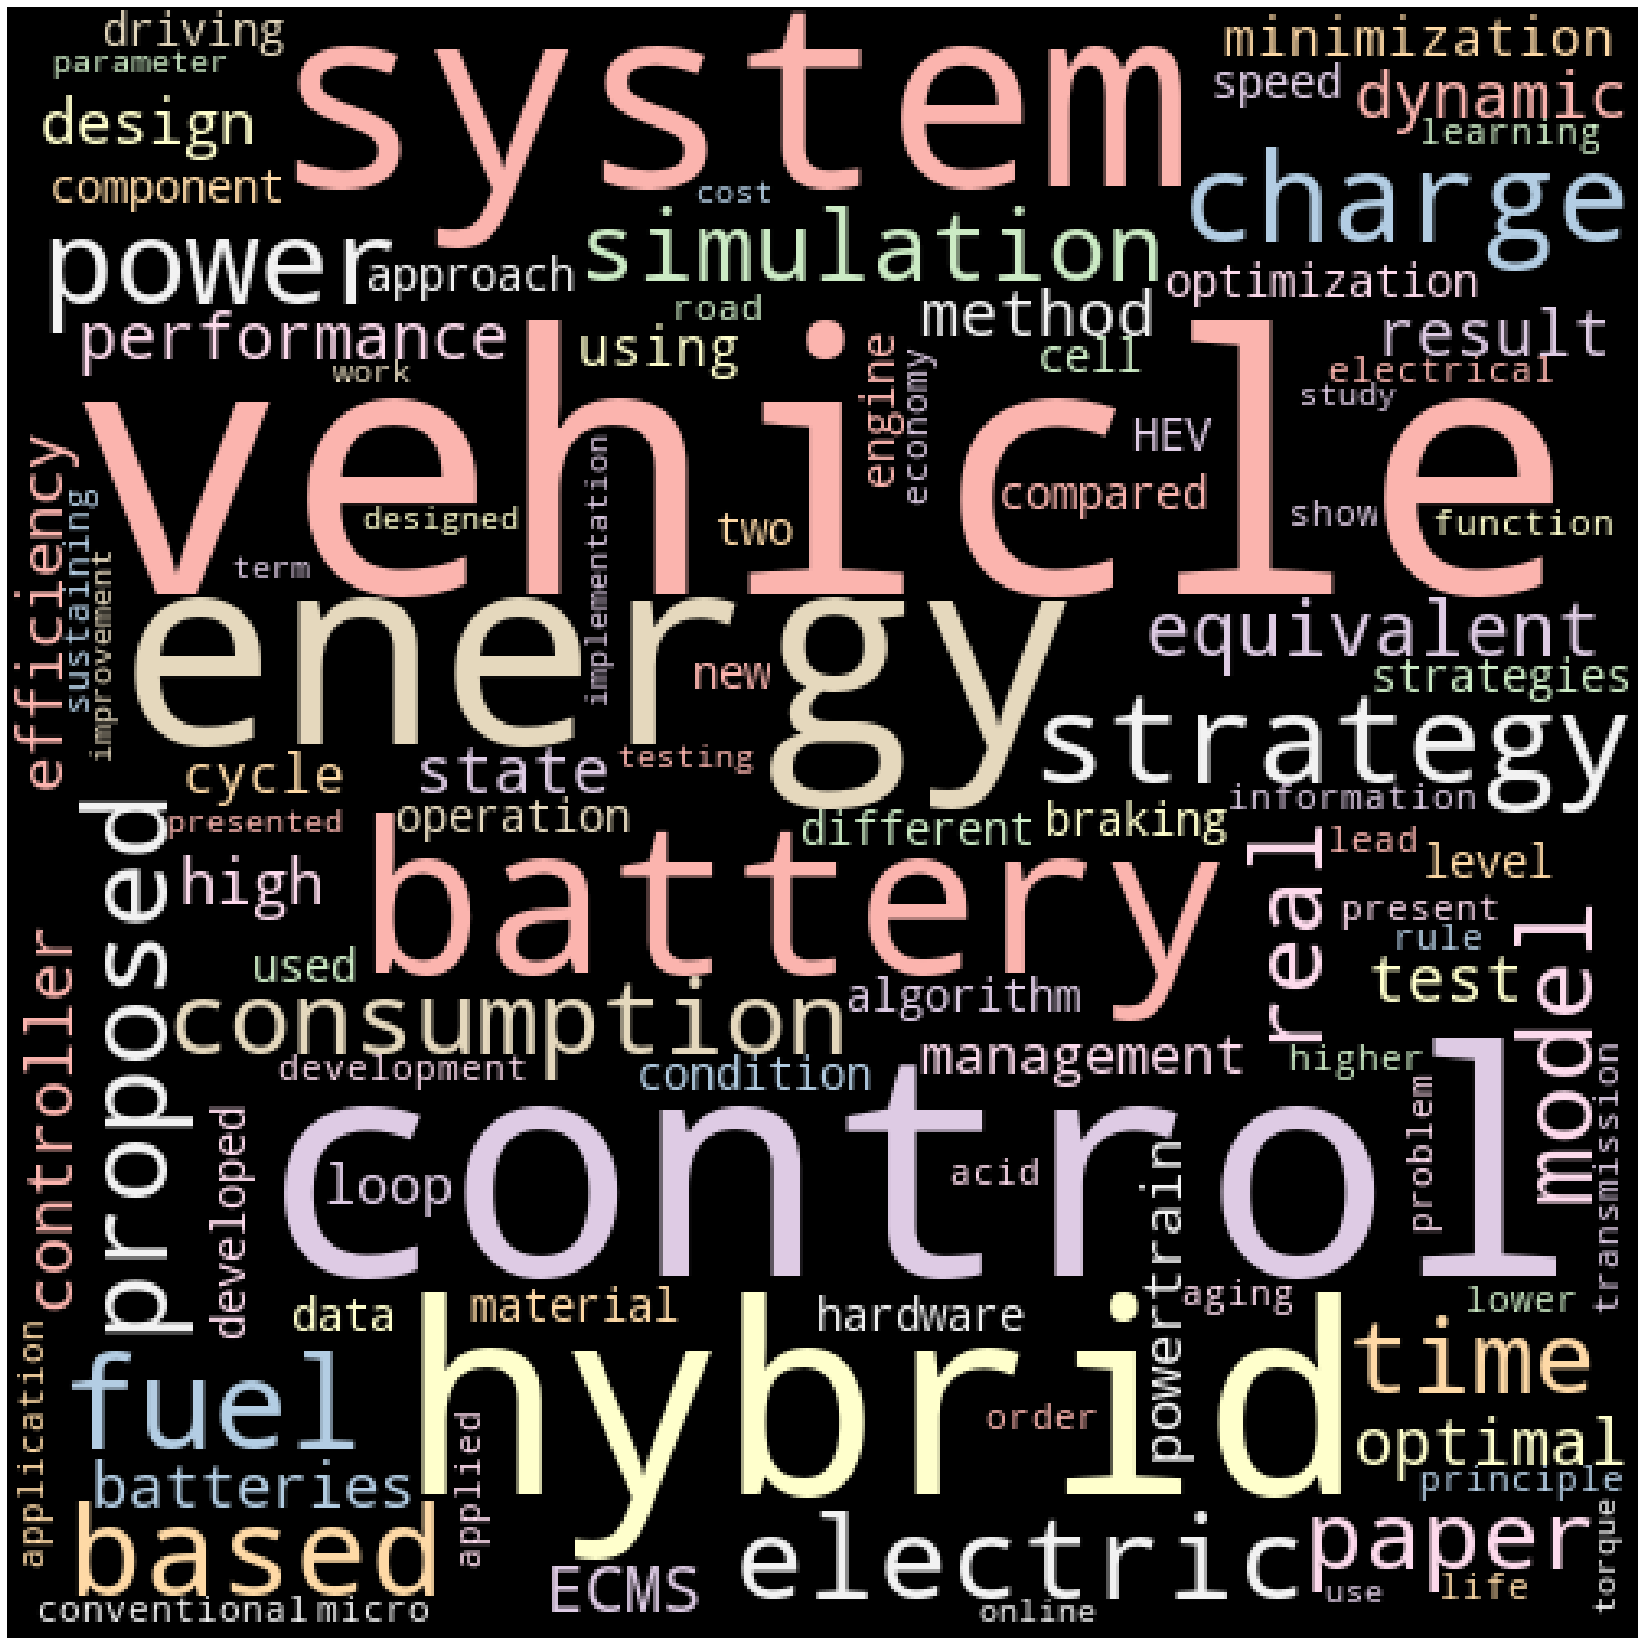

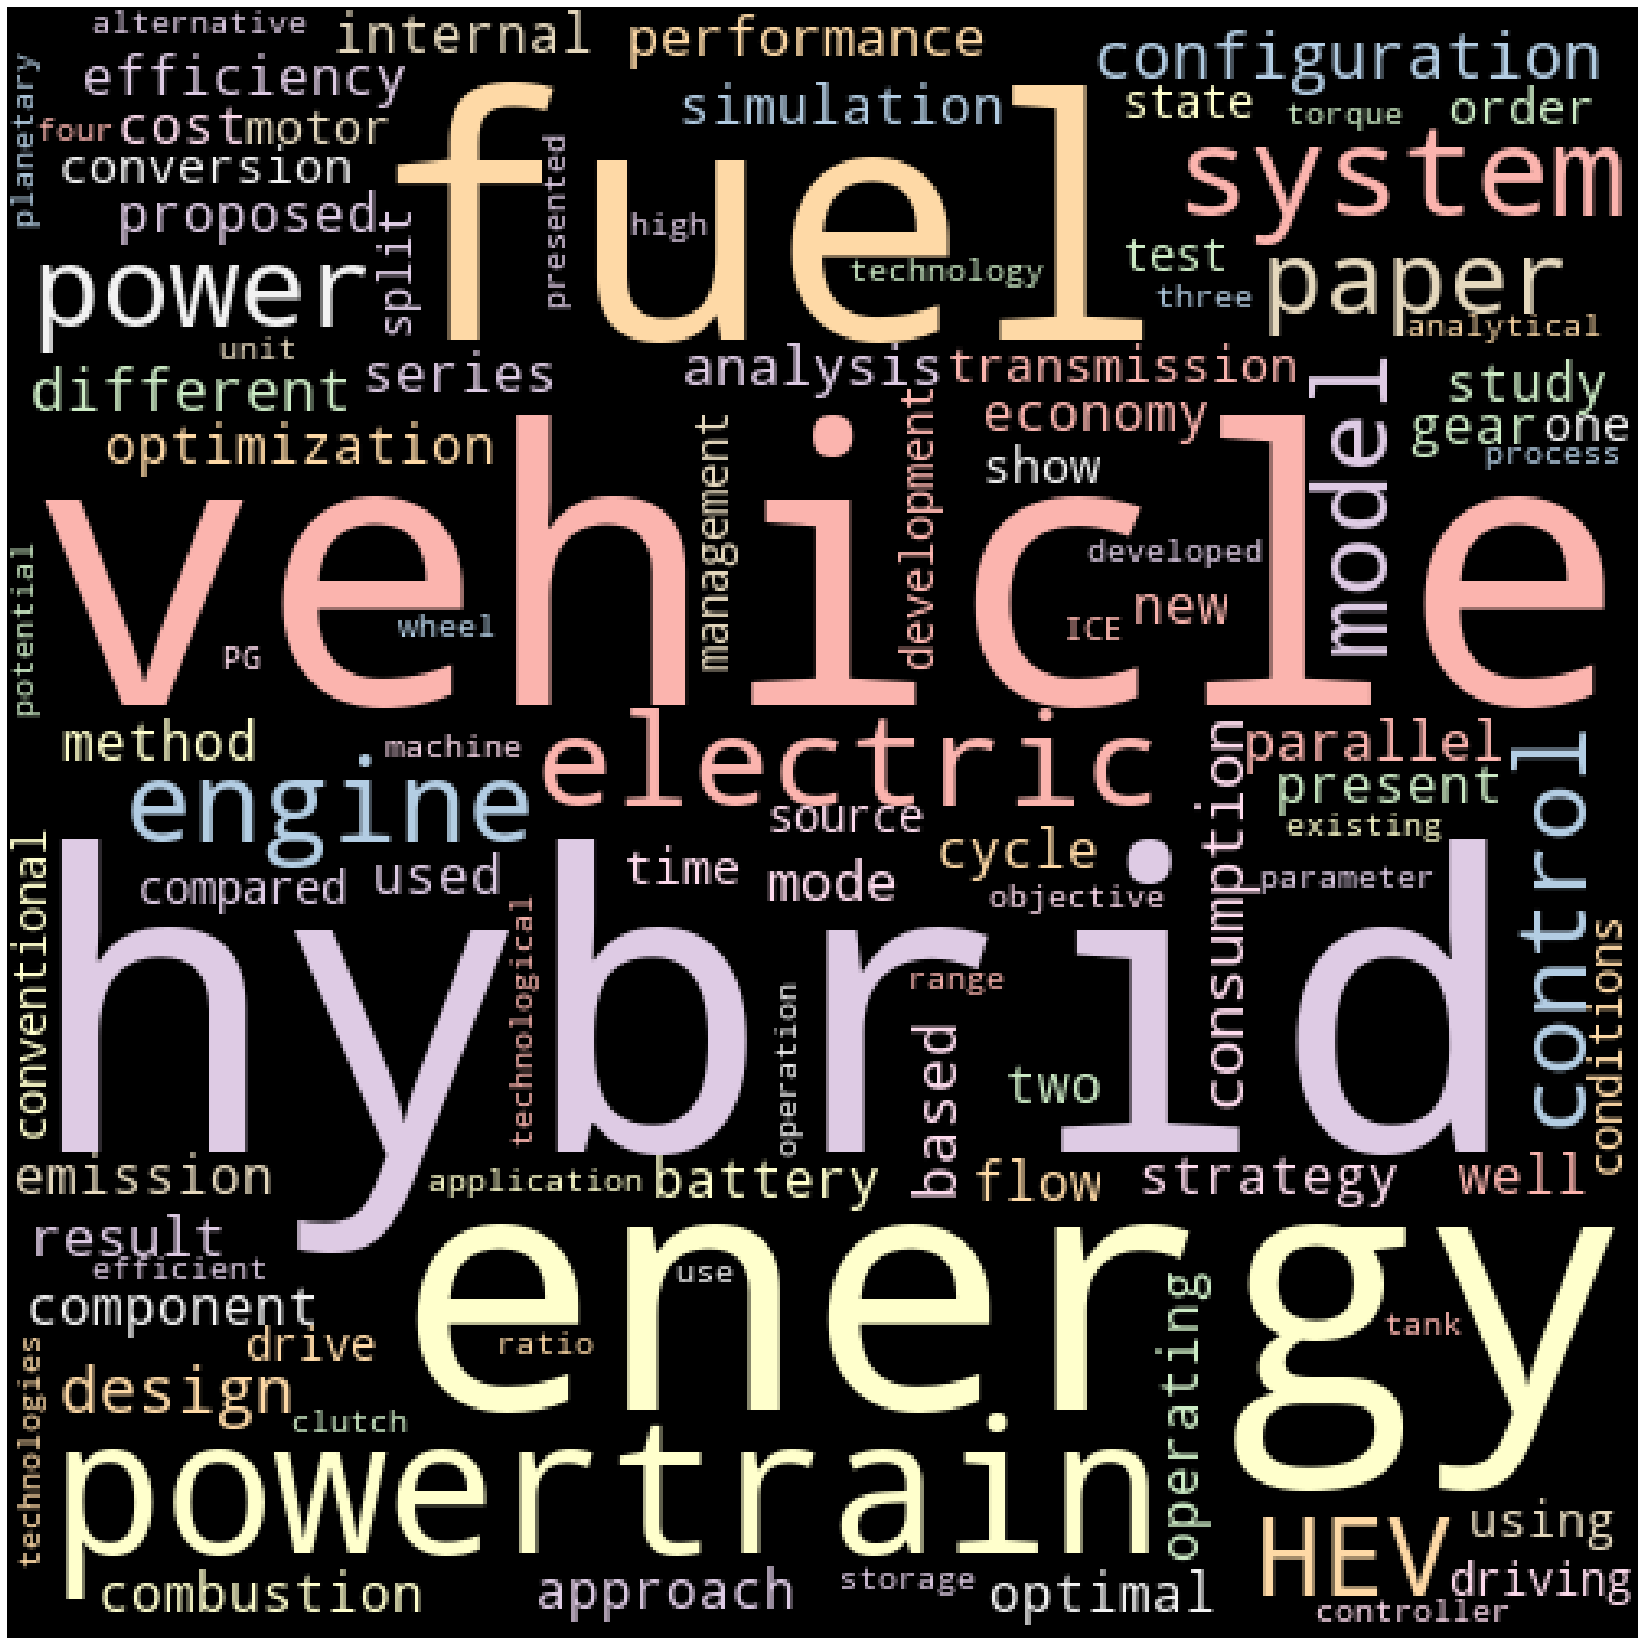

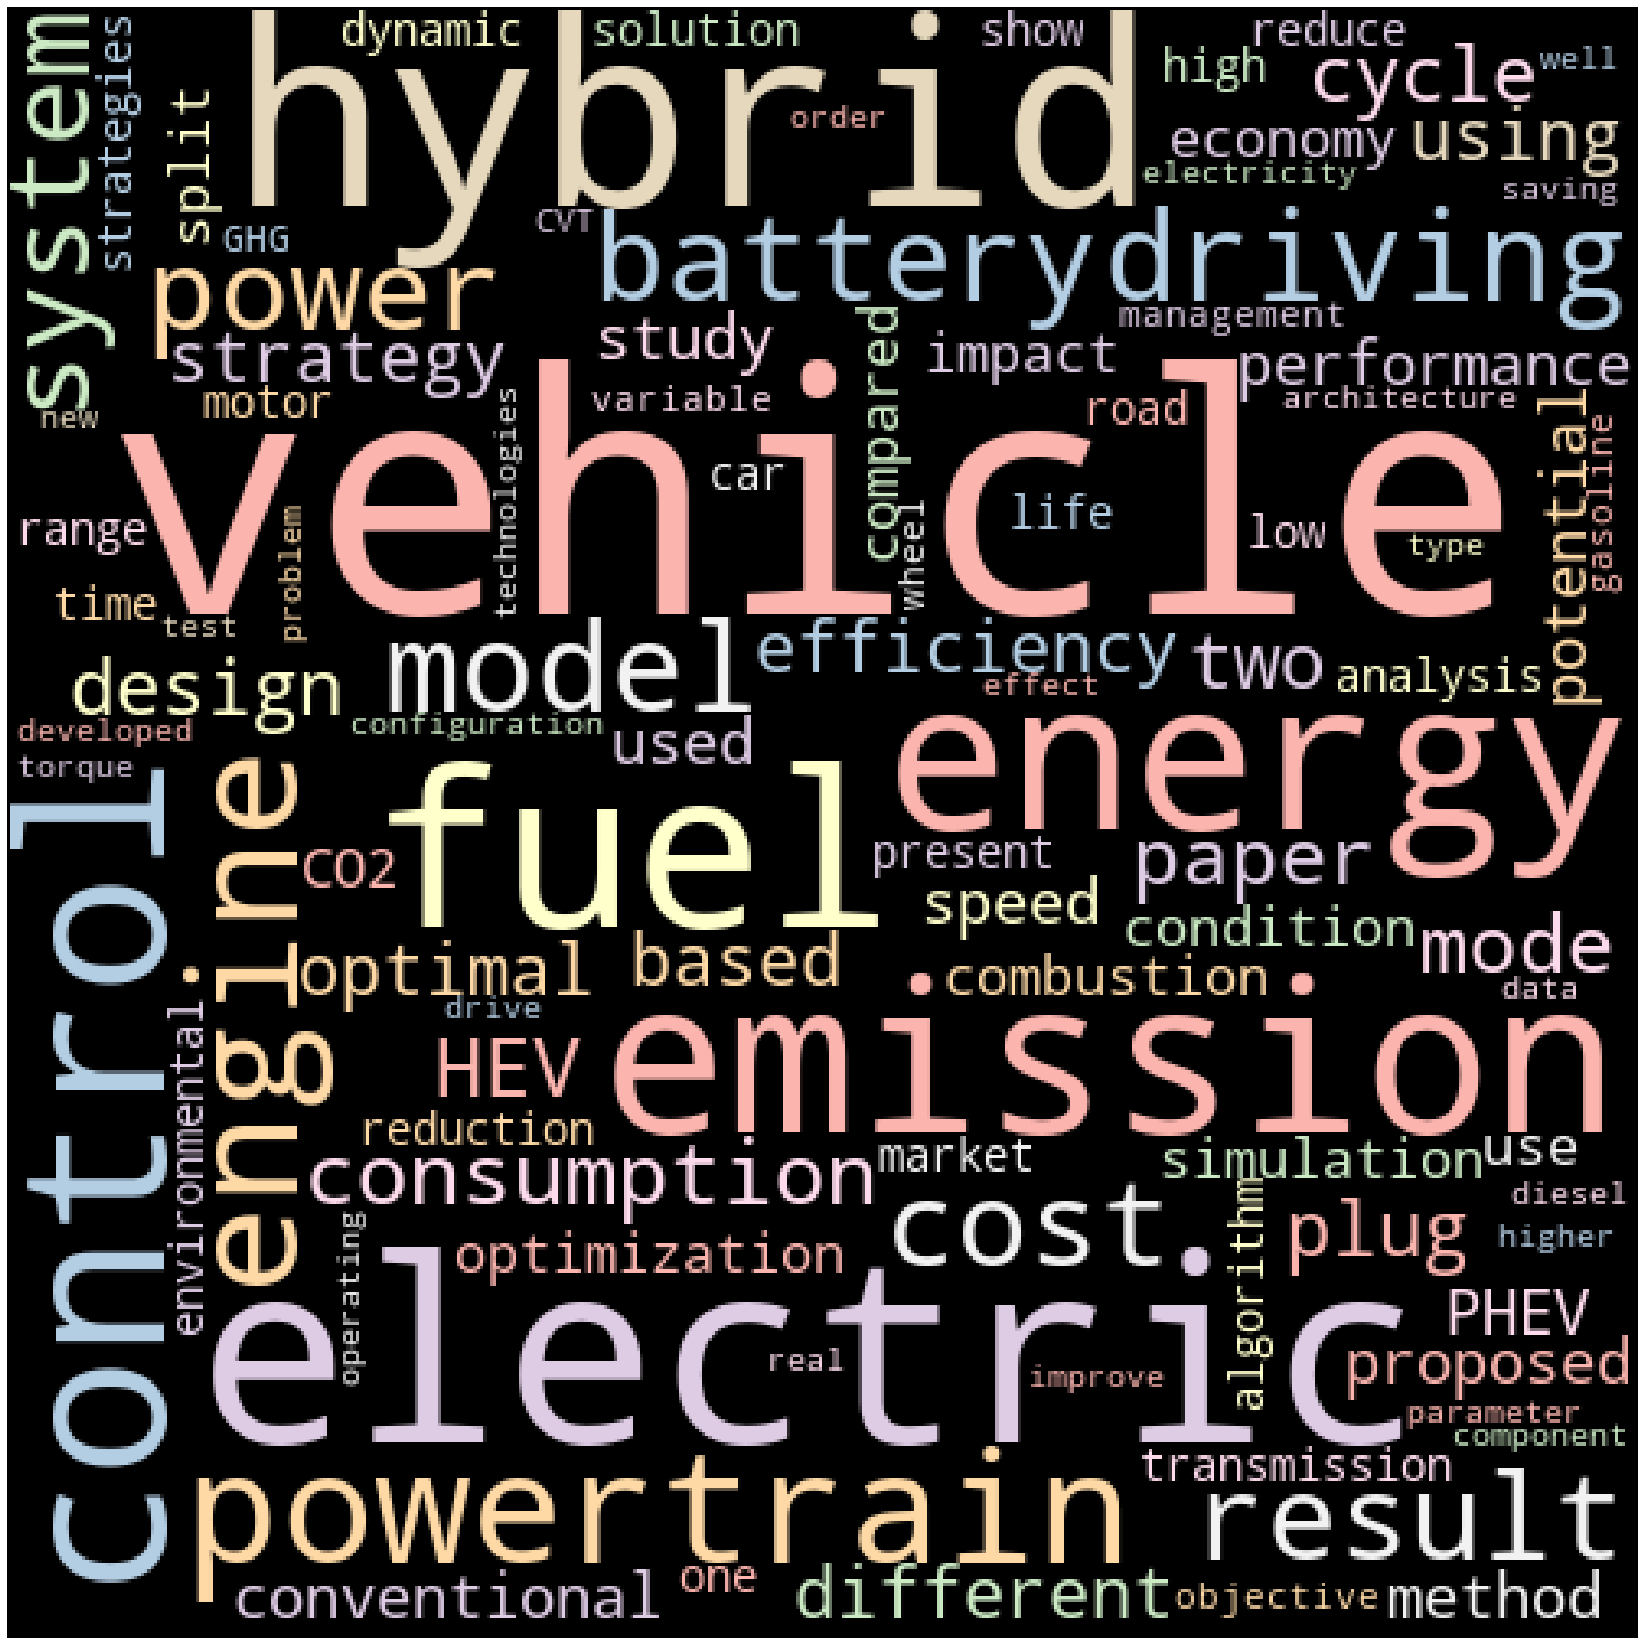

In [ ]:
# Plot Worcloud for topic i
for i in Top5_topics_int:
    df2=df[df['Topic']==i]
    text=df2['Abstract'].sum()
    wordcloud = WordCloud(max_words=100,width = 500, height = 500, random_state=1, background_color='black', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(text)
    # Plot
    plot_cloud(wordcloud)

In [ ]:
# Hierachical clustering!

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

array([8, 9, 0, 5, 9, 2, 2, 2, 5, 8, 1, 3, 2, 9, 0, 1, 5, 5, 0, 3, 1, 2,
       7, 0, 5, 1, 8, 2, 5, 1, 1, 5, 7, 9, 5, 9, 2, 5, 5, 5, 2, 9, 2, 2,
       0, 1, 7, 5, 8, 8, 4, 5, 0, 5, 0, 3, 1, 2, 1, 8, 5, 2, 3, 0, 0, 2,
       1, 2, 2, 1, 7, 8, 1, 7, 9, 9, 5, 9, 7, 5, 8, 2, 2, 1, 9, 9, 9, 1,
       5, 9, 1, 1, 5, 8, 0, 0, 5, 9, 2, 5, 7, 7, 7, 0, 9, 1, 5, 5, 8, 8,
       2, 2, 5, 1, 7, 4, 7, 9, 2, 2, 5, 2, 8, 6, 7, 0, 4, 1, 5, 7, 2, 0,
       2, 3, 2, 1, 6, 6, 5, 3, 1, 4, 2, 5, 9, 8, 7, 3, 5, 4, 7, 9, 5, 7,
       9, 5, 3, 7, 5, 2, 7, 2, 9, 0, 5, 9, 7, 2, 2, 7, 2, 0, 9, 8, 8, 2,
       3, 9, 9, 1, 5, 0, 2, 0, 6, 7, 1, 0, 1, 0, 2, 5, 8, 0, 0, 2, 5, 5,
       2, 1, 7, 5, 7, 7, 5, 2, 7, 5, 3, 1, 0, 0, 0, 2, 2, 1, 4, 1, 0, 0,
       1, 0, 2, 2, 0, 3, 2, 0, 2, 0, 0, 7, 2, 0, 0, 7, 7, 1, 0, 7, 2, 0,
       3, 3, 4, 3, 7, 1, 5, 8, 0, 5, 2, 0, 0, 8, 0, 2, 4, 0, 4, 2, 0, 6,
       8, 6, 4, 9, 0, 0, 7, 3, 4, 3, 7, 2, 2, 9, 2, 5, 4, 6, 0, 0, 2, 0,
       2, 5, 2, 1, 9, 2, 1, 5, 4, 9, 0, 0, 1, 8, 5,

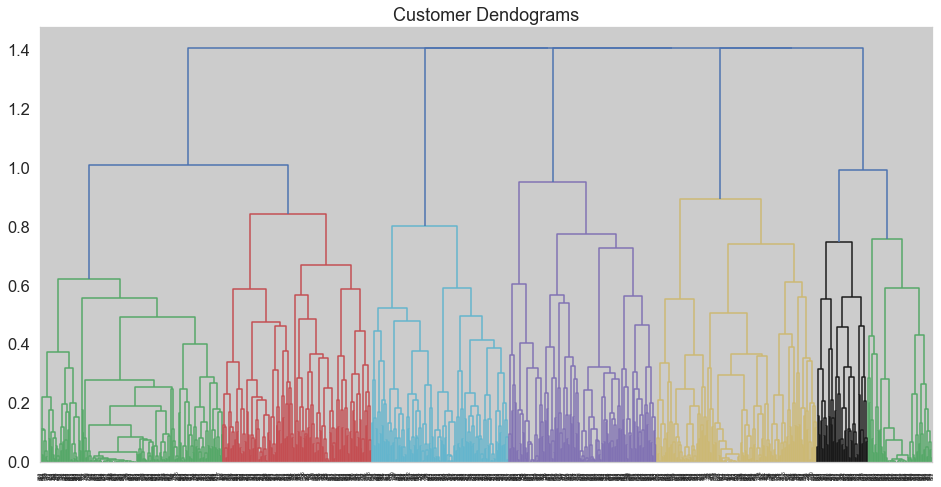

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(16, 8))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(X, method='complete'))

In [ ]:
X

array([[6.13497012e-04, 2.27990465e-02, 1.43810120e-01, ...,
        6.13497012e-04, 6.13497012e-04, 2.44918670e-01],
       [4.71698184e-04, 4.49779045e-02, 6.23588654e-02, ...,
        4.71698184e-04, 4.71698184e-04, 4.71837538e-04],
       [6.28930864e-04, 1.30502457e-01, 1.96732059e-01, ...,
        6.28930864e-04, 6.28930864e-04, 4.52119120e-01],
       ...,
       [7.29927023e-04, 9.93430341e-01, 7.30013259e-04, ...,
        7.29927023e-04, 7.29927023e-04, 7.29977148e-04],
       [1.00000007e-03, 9.76898743e-01, 1.00013658e-03, ...,
        1.00000007e-03, 1.00000007e-03, 1.00012114e-03],
       [5.18134739e-04, 5.18172129e-04, 1.68231558e-01, ...,
        5.18134739e-04, 5.18134739e-04, 5.18174191e-04]])

In [ ]:
import pandas as pd
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, LabelSet
output_notebook()

Loading BokehJS ...

In [ ]:
svd = TruncatedSVD(n_components=2)
words_2d = svd.fit_transform(data_vectorized.T)
 
df = pd.DataFrame(columns=['x', 'y', 'word'])
df['x'], df['y'], df['word'] = words_2d[:,0], words_2d[:,1], vectorizer.get_feature_names()
 
source = ColumnDataSource(ColumnDataSource.from_df(df))
labels = LabelSet(x="x", y="y", text="word", y_offset=8,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
 
plot = figure(plot_width=600, plot_height=600)
plot.circle("x", "y", size=12, source=source, line_color="black", fill_alpha=0.8)
plot.add_layout(labels)
show(plot, notebook_handle=True)

NameError: name 'data_vectorized' is not defined

In [ ]:
import plotly.express as px

In [ ]:
px.scatter(data_frame=df,x='x',y='y',text='word',width=1000,height=1000)

In [ ]:
X=lda_Z

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [ ]:
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=5).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

In [ ]:
df['Topic']=db.labels_+1

In [ ]:
df['Topic']

In [ ]:
min(db.labels_)

-1